In [ ]:
# Figure 1 - AoA
Zie AoA_tools_ECearth.ipynb in /PhD/2017_AoA/

In [ ]:
# Figure 2 - Timeseries with all different runs for a single station

In [29]:
# Figure 3 - Model minus observations for a single run
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import os,sys
import datetime


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
fnnc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_janstart',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)
            flask_nnc6 = os.path.join(path,'nnc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            flask_nnc6_fh = nc.Dataset(flask_nnc6,mode='r')

            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            fnnc6_obs = np.append(fnnc6_obs,flask_nnc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()
            flask_nnc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'fn1c6_obs': fn1c6_obs*1000000,
                   'fn6c6_obs': fn6c6_obs*1000000,
                   'fndc6_obs': fndc6_obs*1000000,
                   'fn6c3_obs': fn6c3_obs*1000000,
                   'fndc3_obs': fndc3_obs*1000000,
                   'fnfc3_obs': fnfc3_obs*1000000,
                   'fnnc6_obs': fnnc6_obs*1000000,
                   'fn3c3_obs': fn3c3_obs*1000000},index=obs_num)


#Select the timeframe to make the plots
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]

C_fn1c3_obs


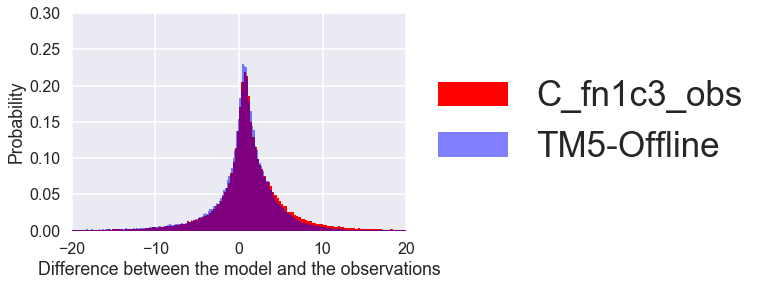

fn3c3_obs


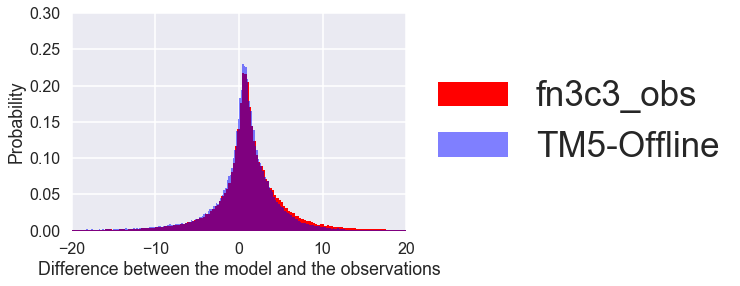

fn6c3_obs


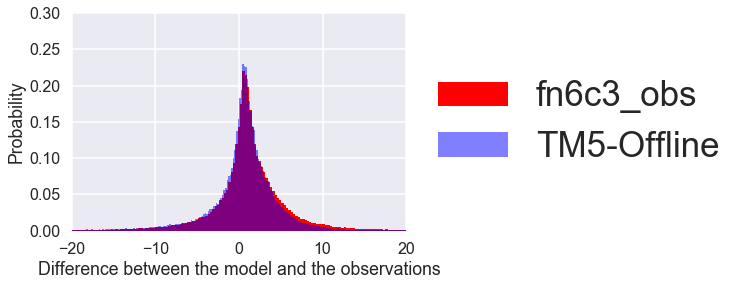

fndc3_obs


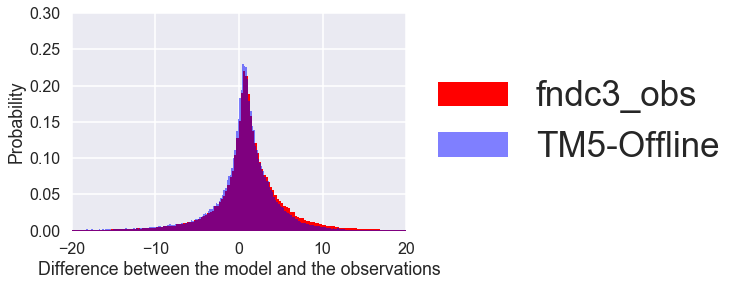

fnfc3_obs


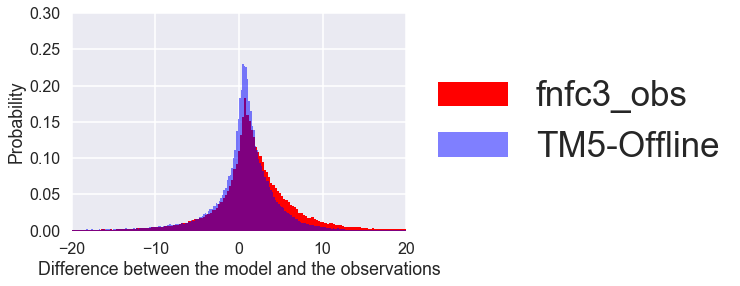

fn1c6_obs


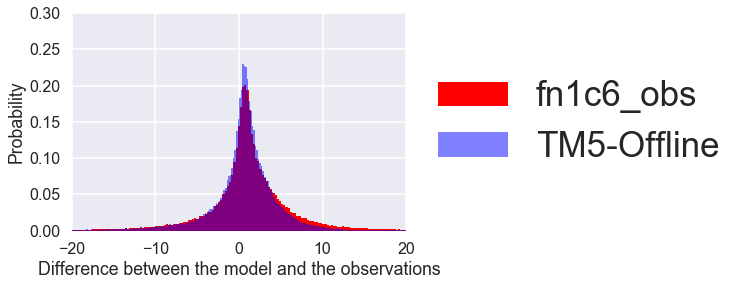

fn6c6_obs


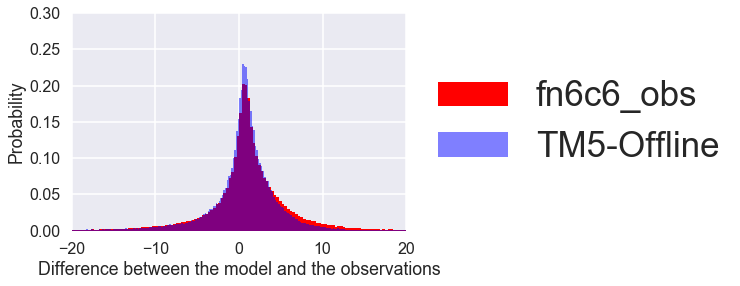

fndc6_obs


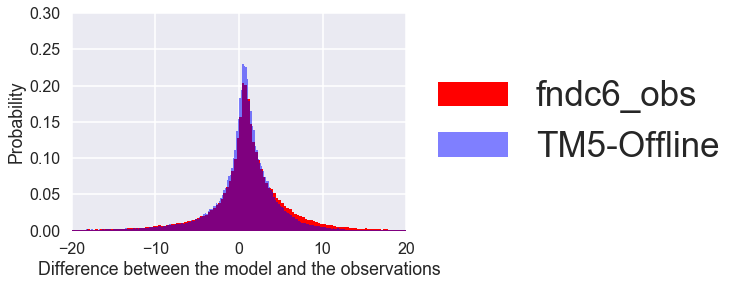

fnnc6_obs


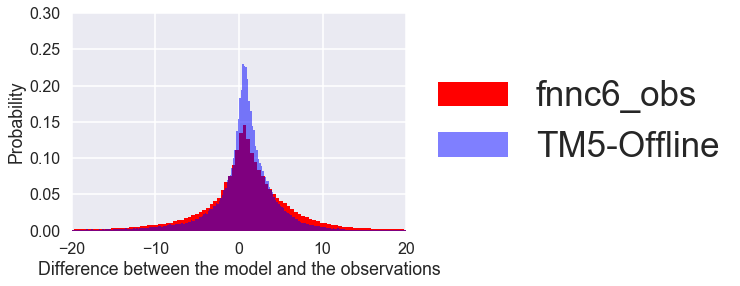

In [32]:
# Only select the afternoon hours (12.00-16.59) for the plot/analysis
df['G_date'] += pd.to_timedelta(np.around(df['F_lon']/15), unit='h')
df = df[(df.G_date.dt.hour >= 12) & (df.G_date.dt.hour <17)]

# Subtract observations from chosen run(s)
df['comparison_offline']=df['B_fmp_obs']-df['A_fin_obs']

runs=('C_fn1c3_obs','fn3c3_obs','fn6c3_obs','fndc3_obs','fnfc3_obs','fn1c6_obs','fn6c6_obs','fndc6_obs','fnnc6_obs')
for run in runs:
    print(run)
    df['comparison2']=df[run]-df['A_fin_obs']

    # Comparison of chosen run(s)
    n, bins, patches = plt.hist(df['comparison2'], 1000, normed=1, facecolor='r', alpha=1, label=run)
    n, bins, patches = plt.hist(df['comparison_offline'], 1000, normed=1, facecolor='b', alpha=0.5, label='TM5-Offline')
    plt.xlabel('Difference between the model and the observations')
    plt.ylabel('Probability')
    plt.axis([-20, 20,0,.3])
    plt.grid(True)
    lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 5,fontsize='35')
    plt.savefig('/Users/killaars/PhD/2017_nudging_coupling_test/paper_figure4/%s_afternoon.png' %(run))
    plt.show()

In [ ]:
# Figure 4 - Time-latitude evolution of 3/6 coupling, n1c3/offline, n1/n6, n6-nd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import os,sys
import datetime


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
fnnc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_janstart',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)
            flask_nnc6 = os.path.join(path,'nnc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            flask_nnc6_fh = nc.Dataset(flask_nnc6,mode='r')

            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            fnnc6_obs = np.append(fnnc6_obs,flask_nnc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()
            flask_nnc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'fn1c6_obs': fn1c6_obs*1000000,
                   'fn6c6_obs': fn6c6_obs*1000000,
                   'fndc6_obs': fndc6_obs*1000000,
                   'fn6c3_obs': fn6c3_obs*1000000,
                   'fndc3_obs': fndc3_obs*1000000,
                   'fnfc3_obs': fnfc3_obs*1000000,
                   'fnnc6_obs': fnnc6_obs*1000000,
                   'fn3c3_obs': fn3c3_obs*1000000},index=obs_num)


#Select the timeframe to make the plots
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]

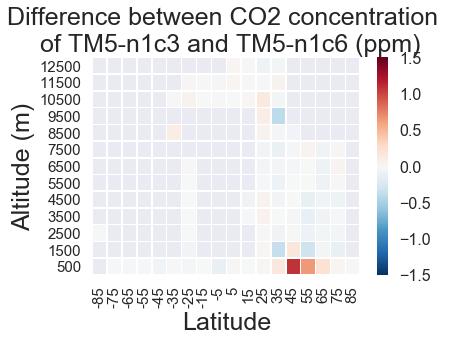

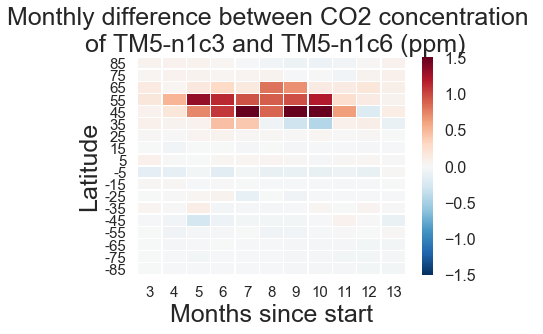

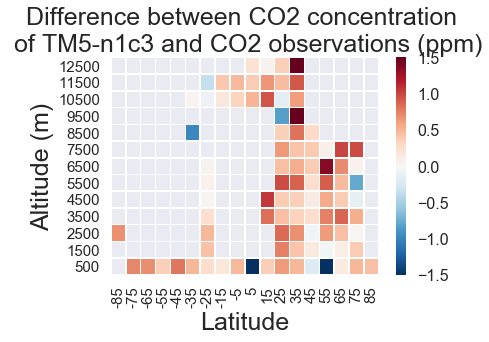

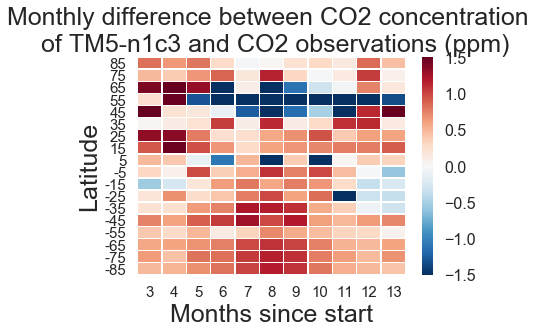

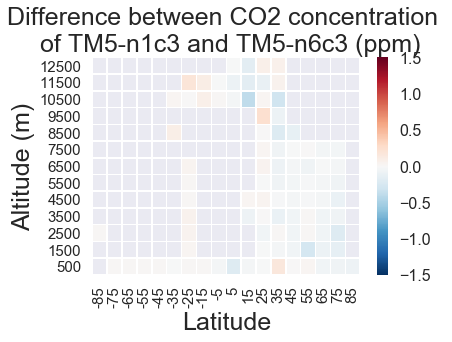

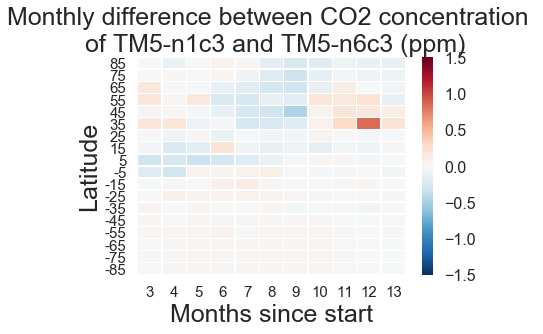

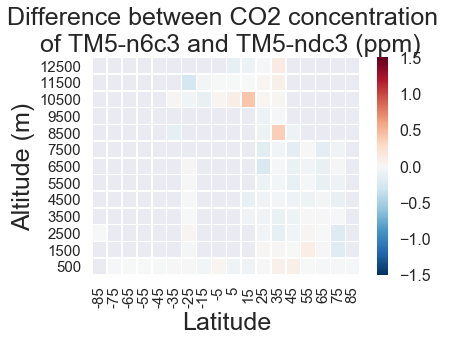

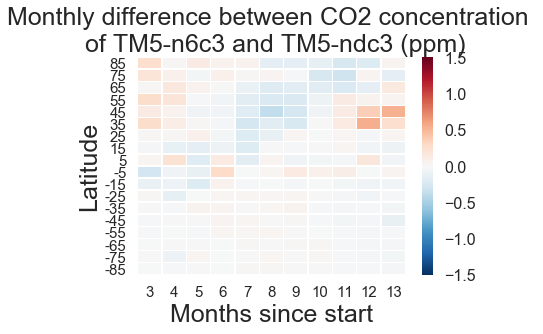

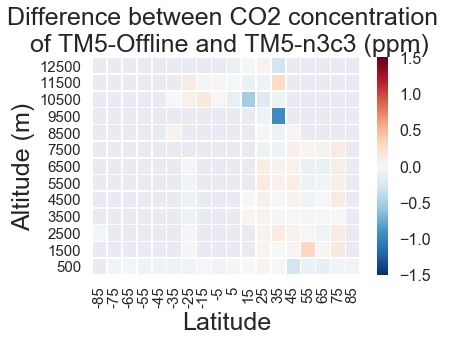

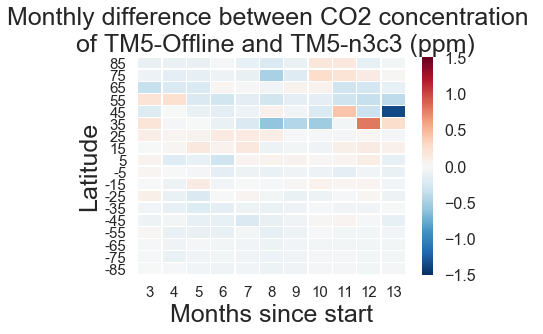

In [19]:
df = df[(df.A_fin_obs<500) & (df.A_fin_obs>350)]
df['month'] = pd.DatetimeIndex(df['G_date']).month
df['year'] = pd.DatetimeIndex(df['G_date']).year
df['cum_month'] = df['month']-11+(12*(df['year']-2013))
#print(df['I_obs_loc'=='ces'])

# Some statements to change for different runs
run1= 'C_fn1c3_obs'
run2= 'fn1c6_obs'
title_alt='Difference between CO2 concentration \n of TM5-n1c3 and TM5-n1c6 (ppm)'
title_time='Monthly difference between CO2 concentration \n of TM5-n1c3 and TM5-n1c6 (ppm)'

# Difference between the two selected runs from above
df['difference'] = df[run1]-df[run2]

# Global mask to view all the data
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200)
mask=GLOB

# First altitudeplot, below time
# Calculate the mean of all the values that fit in the numpy array boxes and use the unstack function to get rid of the multi-index dataframe
lat_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()

# invert the altitude axis
lat_diff = lat_diff.reindex(index=lat_diff.index[::-1])

# specify new axis
alt_index = np.arange(12500,-500,-1000)
lat_index = np.arange(-85,95,10)

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(lat_diff,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title=title_alt)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - alt-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Now time
# Calculate the monthly mean of the differences between the models for every latitudebox
time_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
# Create time index
timeindex = 1+np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1)
#print(timeindex)

# invert the latitude axis
time_diff = time_diff.reindex(index=time_diff.index[::-1])

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(time_diff,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title=title_time)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - time-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Some statements to change for different runs
run1= 'C_fn1c3_obs'
run2= 'A_fin_obs'
title_alt='Difference between CO2 concentration \n of TM5-n1c3 and CO2 observations (ppm)'
title_time='Monthly difference between CO2 concentration \n of TM5-n1c3 and CO2 observations (ppm)'

# Difference between the two selected runs from above
df['difference'] = df[run1]-df[run2]

# Global mask to view all the data
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200)
mask=GLOB

# First altitudeplot, below time
# Calculate the mean of all the values that fit in the numpy array boxes and use the unstack function to get rid of the multi-index dataframe
lat_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()

# invert the altitude axis
lat_diff = lat_diff.reindex(index=lat_diff.index[::-1])

# specify new axis
alt_index = np.arange(12500,-500,-1000)
lat_index = np.arange(-85,95,10)

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(lat_diff,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title=title_alt)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - alt-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Now time
# Calculate the monthly mean of the differences between the models for every latitudebox
time_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
# Create time index
timeindex = 1+np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1)
#print(timeindex)

# invert the latitude axis
time_diff = time_diff.reindex(index=time_diff.index[::-1])

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(time_diff,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title=title_time)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - time-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Some statements to change for different runs
run1= 'C_fn1c3_obs'
run2= 'fn6c3_obs'
title_alt='Difference between CO2 concentration \n of TM5-n1c3 and TM5-n6c3 (ppm)'
title_time='Monthly difference between CO2 concentration \n of TM5-n1c3 and TM5-n6c3 (ppm)'

# Difference between the two selected runs from above
df['difference'] = df[run1]-df[run2]

# Global mask to view all the data
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200)
mask=GLOB

# First altitudeplot, below time
# Calculate the mean of all the values that fit in the numpy array boxes and use the unstack function to get rid of the multi-index dataframe
lat_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()

# invert the altitude axis
lat_diff = lat_diff.reindex(index=lat_diff.index[::-1])

# specify new axis
alt_index = np.arange(12500,-500,-1000)
lat_index = np.arange(-85,95,10)

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(lat_diff,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title=title_alt)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - alt-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Now time
# Calculate the monthly mean of the differences between the models for every latitudebox
time_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
# Create time index
timeindex = 1+np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1)
#print(timeindex)

# invert the latitude axis
time_diff = time_diff.reindex(index=time_diff.index[::-1])

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(time_diff,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title=title_time)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - time-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Some statements to change for different runs
run1= 'fn6c3_obs'
run2= 'fndc3_obs'
title_alt='Difference between CO2 concentration \n of TM5-n6c3 and TM5-ndc3 (ppm)'
title_time='Monthly difference between CO2 concentration \n of TM5-n6c3 and TM5-ndc3 (ppm)'

# Difference between the two selected runs from above
df['difference'] = df[run1]-df[run2]

# Global mask to view all the data
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200)
mask=GLOB

# First altitudeplot, below time
# Calculate the mean of all the values that fit in the numpy array boxes and use the unstack function to get rid of the multi-index dataframe
lat_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()

# invert the altitude axis
lat_diff = lat_diff.reindex(index=lat_diff.index[::-1])

# specify new axis
alt_index = np.arange(12500,-500,-1000)
lat_index = np.arange(-85,95,10)

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(lat_diff,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title=title_alt)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - alt-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Now time
# Calculate the monthly mean of the differences between the models for every latitudebox
time_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
# Create time index
timeindex = 1+np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1)
#print(timeindex)

# invert the latitude axis
time_diff = time_diff.reindex(index=time_diff.index[::-1])

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(time_diff,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title=title_time)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - time-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Some statements to change for different runs
run1= 'B_fmp_obs'
run2= 'fn3c3_obs'
title_alt='Difference between CO2 concentration \n of TM5-Offline and TM5-n3c3 (ppm)'
title_time='Monthly difference between CO2 concentration \n of TM5-Offline and TM5-n3c3 (ppm)'

# Difference between the two selected runs from above
df['difference'] = df[run1]-df[run2]

# Global mask to view all the data
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200)
mask=GLOB

# First altitudeplot, below time
# Calculate the mean of all the values that fit in the numpy array boxes and use the unstack function to get rid of the multi-index dataframe
lat_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()

# invert the altitude axis
lat_diff = lat_diff.reindex(index=lat_diff.index[::-1])

# specify new axis
alt_index = np.arange(12500,-500,-1000)
lat_index = np.arange(-85,95,10)

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(lat_diff,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title=title_alt)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - alt-lat - n1c3-n1c6.png',dpi=300)
plt.show()

# Now time
# Calculate the monthly mean of the differences between the models for every latitudebox
time_diff = df[mask]['difference'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
# Create time index
timeindex = 1+np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1)
#print(timeindex)

# invert the latitude axis
time_diff = time_diff.reindex(index=time_diff.index[::-1])

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(time_diff,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title=title_time)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('BBOS - time-lat - n1c3-n1c6.png',dpi=300)
plt.show()

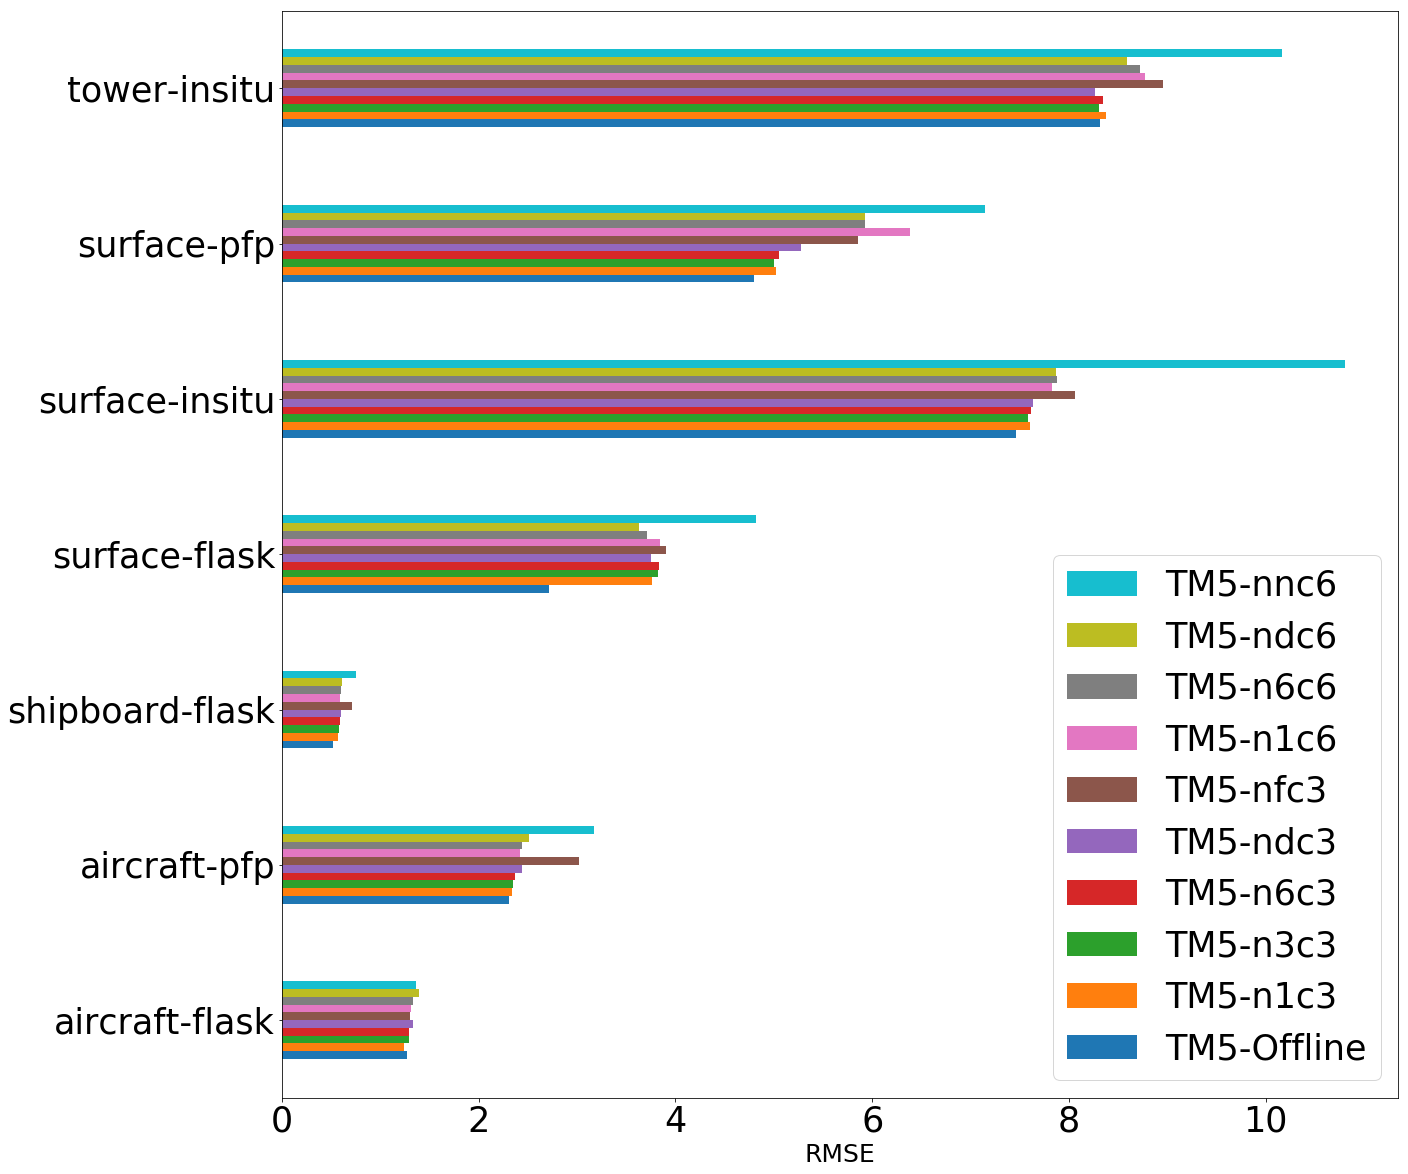

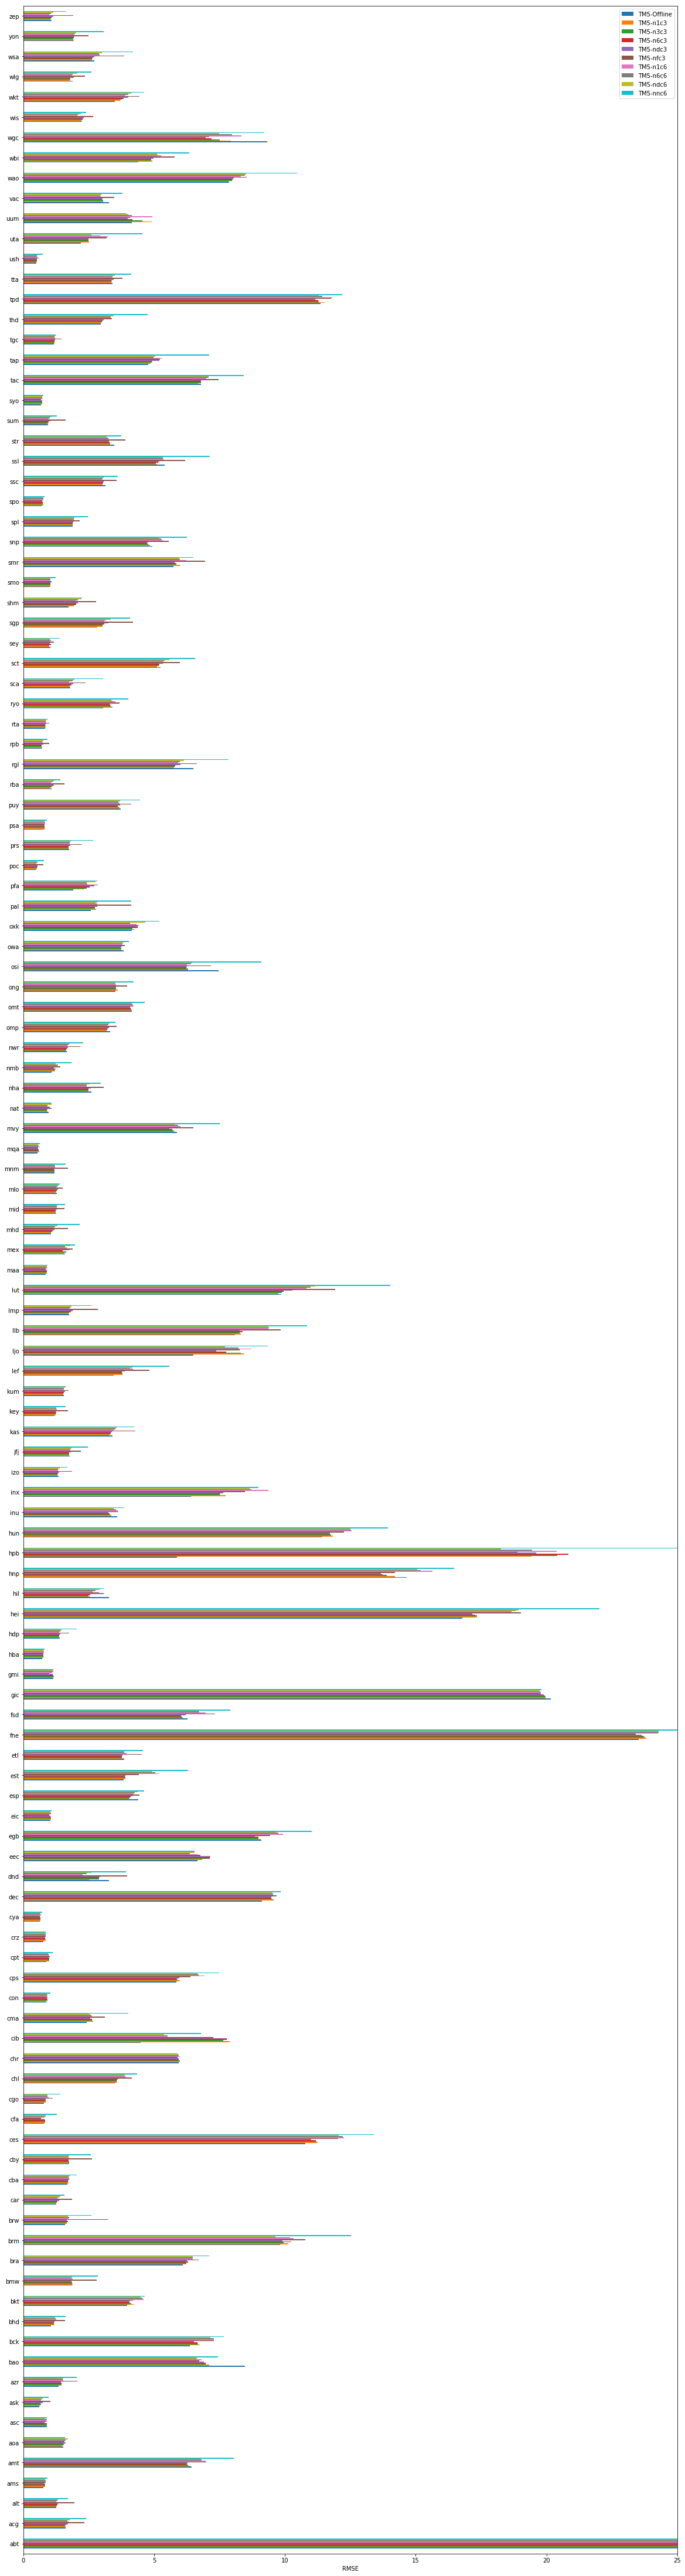

In [2]:
# Figure 5 - RMSE barplots
#6 Bar charts with the RMSE of the different stations and different type. 
#  Code extension allows to easily switch the timeseries graph for any chosen station.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import os,sys
import datetime


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
fnnc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_janstart',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)
            flask_nnc6 = os.path.join(path,'nnc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            flask_nnc6_fh = nc.Dataset(flask_nnc6,mode='r')

            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            fnnc6_obs = np.append(fnnc6_obs,flask_nnc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()
            flask_nnc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'fn1c6_obs': fn1c6_obs*1000000,
                   'fn6c6_obs': fn6c6_obs*1000000,
                   'fndc6_obs': fndc6_obs*1000000,
                   'fn6c3_obs': fn6c3_obs*1000000,
                   'fndc3_obs': fndc3_obs*1000000,
                   'fnfc3_obs': fnfc3_obs*1000000,
                   'fnnc6_obs': fnnc6_obs*1000000,
                   'fn3c3_obs': fn3c3_obs*1000000},index=obs_num)


#Select the timeframe to make the plots
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]

# # Only select the afternoon hours (12.00-16.59) for the plot/analysis
# df['G_date'] += pd.to_timedelta(np.around(df['F_lon']/15), unit='h')
# df = df[(df.G_date.dt.hour >= 12) & (df.G_date.dt.hour <17)]


#remove values with too high observations
df = df[df.A_fin_obs<500]
#calculate difference between models and observations and square it
df['J_TM5_offline'] = (df['B_fmp_obs']-df['A_fin_obs'])**2
df['K_TM5_n1c3'] = (df['C_fn1c3_obs']-df['A_fin_obs'])**2
df['L_TM5_n6c3'] = (df['fn6c3_obs']-df['A_fin_obs'])**2
df['M_TM5_ndc3'] = (df['fndc3_obs']-df['A_fin_obs'])**2
df['N_TM5_n1c6'] = (df['fn1c6_obs']-df['A_fin_obs'])**2
df['O_TM5_n6c6'] = (df['fn6c6_obs']-df['A_fin_obs'])**2
df['P_TM5_ndc6'] = (df['fndc6_obs']-df['A_fin_obs'])**2
df['Q_TM5_n3c3'] = (df['fn3c3_obs']-df['A_fin_obs'])**2
df['R_TM5_nfc3'] = (df['fnfc3_obs']-df['A_fin_obs'])**2
df['S_TM5_nnc6'] = (df['fnnc6_obs']-df['A_fin_obs'])**2

#calculation of RMSE for the types of measurements
#group the difference(column-J) by type and give the mean and the count, two dataframes, Offline and ESM
sample_type_off = df['J_TM5_offline'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c3 = df['K_TM5_n1c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c3 = df['L_TM5_n6c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc3 = df['M_TM5_ndc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c6 = df['N_TM5_n1c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c6 = df['O_TM5_n6c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc6 = df['P_TM5_ndc6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n3c3 = df['Q_TM5_n3c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nfc3 = df['R_TM5_nfc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nnc6 = df['S_TM5_nnc6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
#Merge the two dataframes together - All lines
# pieces_type = [sample_type_off,sample_type_off_new,sample_type_n1c3,sample_type_n3c3,sample_type_n6c3,sample_type_ndc3,sample_type_nfc3,sample_type_n1c6,sample_type_n6c6,sample_type_ndc6]
# sample_type=pd.concat(pieces_type,keys=['TM5-Offline','TM5-Offline_new','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])
#Merge the two dataframes together - Selection of lines
pieces_type = [sample_type_off,sample_type_n1c3,sample_type_n3c3,sample_type_n6c3,sample_type_ndc3,sample_type_nfc3,sample_type_n1c6,sample_type_n6c6,sample_type_ndc6,sample_type_nnc6]
sample_type=pd.concat(pieces_type,keys=['TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6','TM5-nnc6'])
#Calculate the RMSE by giving the sqrt of the mean (mean was the square of the differences for each type)
sample_type['RMSE']=np.sqrt(sample_type['mean'])

#calculation of RMSE of the different locations of measurement, see above for method
#Use only stations with 20 or more measurements
count_loc = df['I_obs_loc'].value_counts()
count_loc[count_loc > 19]
df_loc = df[df['I_obs_loc'].isin(count_loc[count_loc > 19].index)]
sample_loc_off = df_loc['J_TM5_offline'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c3 = df_loc['K_TM5_n1c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c3 = df_loc['L_TM5_n6c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc3 = df_loc['M_TM5_ndc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c6 = df_loc['N_TM5_n1c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c6 = df_loc['O_TM5_n6c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc6 = df_loc['P_TM5_ndc6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n3c3 = df_loc['Q_TM5_n3c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nfc3 = df_loc['R_TM5_nfc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nnc6 = df_loc['S_TM5_nnc6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
# Setup for the all the types
# pieces_loc = [sample_loc_off,sample_loc_off_new,sample_loc_n1c3,sample_loc_n3c3,sample_loc_n6c3,sample_loc_ndc3,sample_loc_nfc3,sample_loc_n1c6,sample_loc_n6c6,sample_loc_ndc6]
# sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-Offline_new','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])

# Different lines, pay attention to the order!
pieces_loc = [sample_loc_off,sample_loc_n1c3,sample_loc_n3c3,sample_loc_n6c3,sample_loc_ndc3,sample_loc_nfc3,sample_loc_n1c6,sample_loc_n6c6,sample_loc_ndc6,sample_loc_nnc6]
sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6','TM5-nnc6'])

sample_loc['RMSE']=np.sqrt(sample_loc['mean'])


#Plot the dataframes in barplots. First unstack them, keeping only the RMSE
plot_type=sample_type['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax1 = plot_type.plot.barh(figsize=(20,20),title='',fontsize=25,legend=False)
handles, labels = ax1.get_legend_handles_labels()
lgd=ax1.legend(handles[::-1], labels[::-1],loc='lower right', markerscale = 5,fontsize='35')
ax1.set_xlabel("RMSE",fontsize=25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
#plt.savefig('BBOS - RMSE_type.png',dpi=300)

plot_loc=sample_loc['RMSE'].unstack(level=0)
plot_loc.index.name = ''
ax2 = plot_loc.plot.barh(figsize=(20,80))
ax2.set_xlabel("RMSE")
plt.xlim(0,25)
#plt.savefig('RMSE_stations.png',dpi=300)
plt.show()

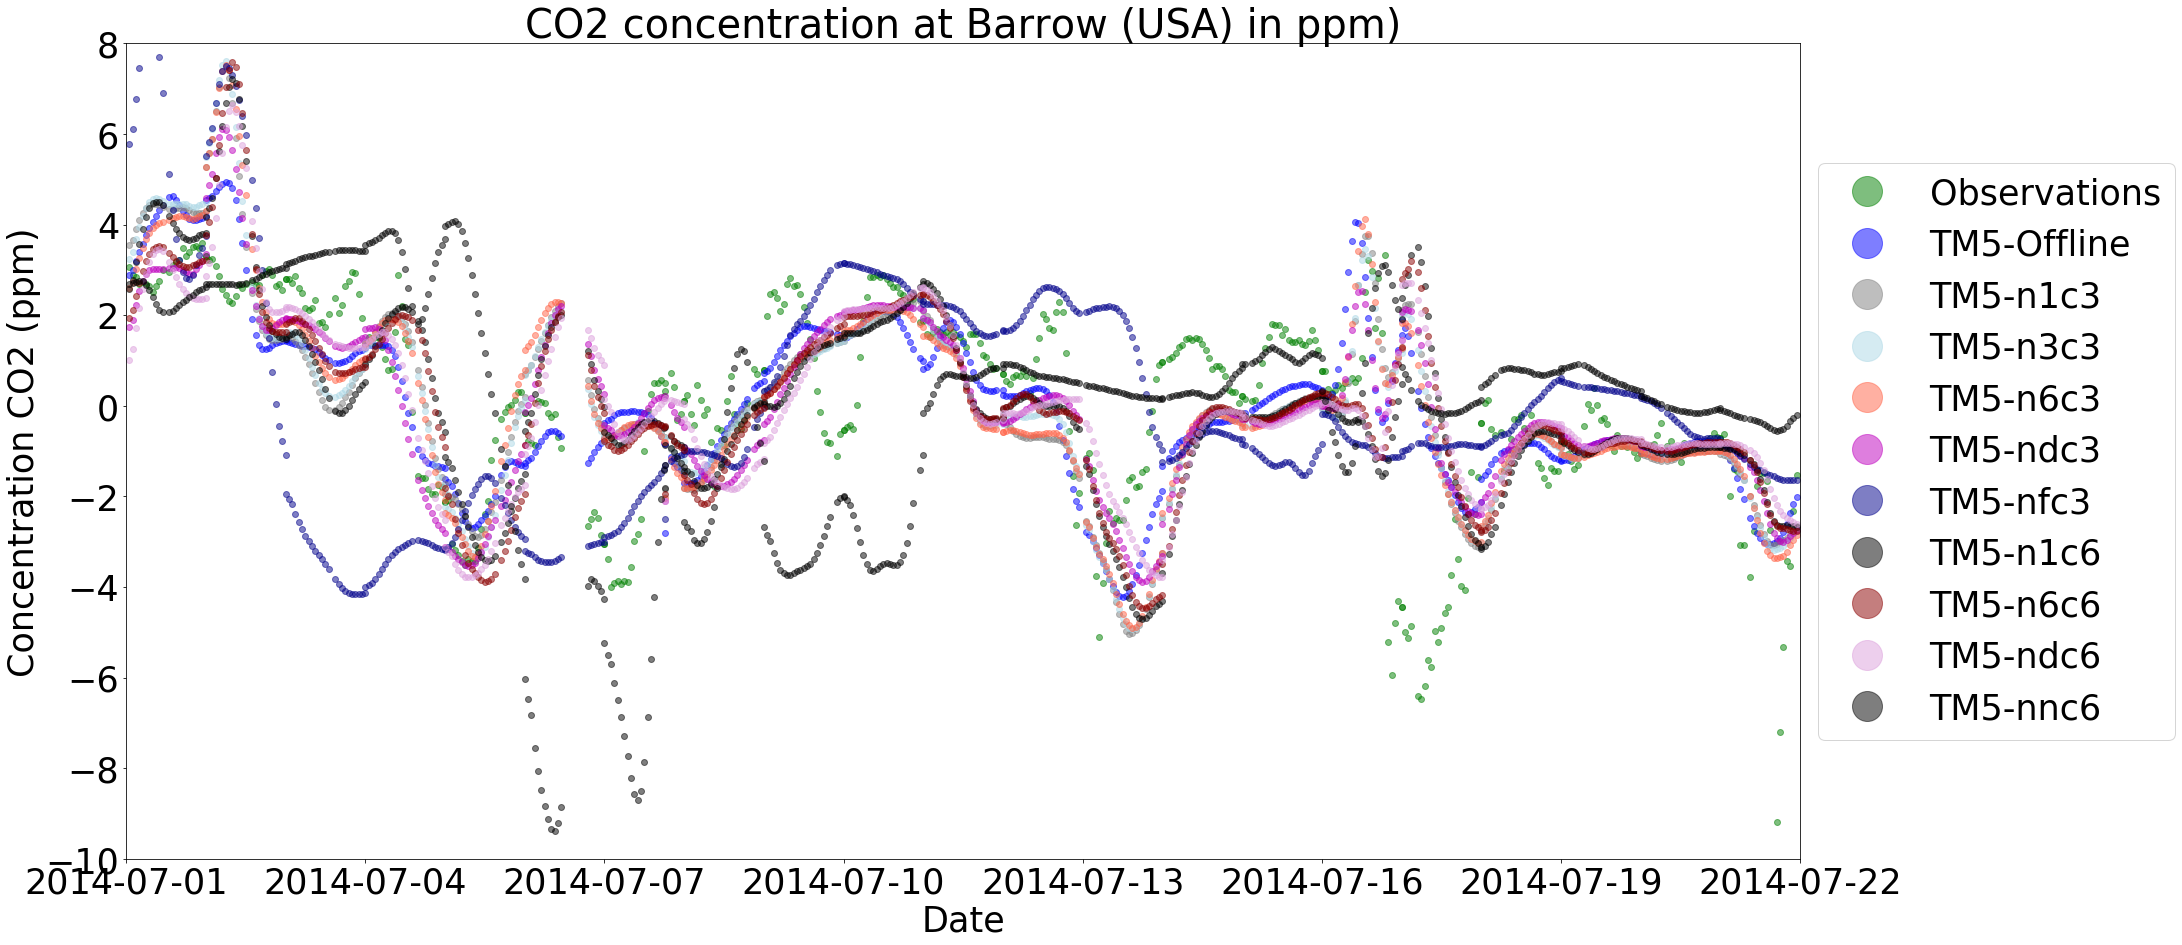

In [4]:
# Timeseries of chosen plot (comparable to figure 1), uses the data calculated by the previous block. 
# Can afterwards be run multiple times for chosen stations
df = df[(df.G_date>'2014-07-01') & (df.G_date<'2014-07-22')]
f, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(30, 15))
size = 6
alpha=.5
mask_loc = 'brw'
mask = (df.I_obs_loc==mask_loc)
ax1.set_title("CO2 concentration at Barrow (USA) in ppm)",fontsize=40)
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask]-df.A_fin_obs[mask].mean(), color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask]-df.B_fmp_obs[mask].mean(), color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fn1c3_obs[mask]-df.C_fn1c3_obs[mask].mean(), color='0.5', alpha=alpha, ms=size, label='TM5-n1c3')
ax1.plot_date(x=df.G_date[mask], y=df.fn3c3_obs[mask]-df.fn3c3_obs[mask].mean(), color='lightblue', alpha=alpha, ms=size, label='TM5-n3c3')
ax1.plot_date(x=df.G_date[mask], y=df.fn6c3_obs[mask]-df.fn6c3_obs[mask].mean(), color='tomato', alpha=alpha, ms=size, label='TM5-n6c3')
ax1.plot_date(x=df.G_date[mask], y=df.fndc3_obs[mask]-df.fndc3_obs[mask].mean(), color='m',alpha=alpha, ms=size, label='TM5-ndc3')
ax1.plot_date(x=df.G_date[mask], y=df.fnfc3_obs[mask]-df.fnfc3_obs[mask].mean(), color='darkblue',alpha=alpha, ms=size, label='TM5-nfc3')
ax1.plot_date(x=df.G_date[mask], y=df.fn1c6_obs[mask]-df.fn1c6_obs[mask].mean(), color='0', alpha=alpha, ms=size, label='TM5-n1c6')
ax1.plot_date(x=df.G_date[mask], y=df.fn6c6_obs[mask]-df.fn6c6_obs[mask].mean(), color='darkred', alpha=alpha, ms=size, label='TM5-n6c6')
ax1.plot_date(x=df.G_date[mask], y=df.fndc6_obs[mask]-df.fndc6_obs[mask].mean(), color='plum', alpha=alpha, ms=size, label='TM5-ndc6')
ax1.plot_date(x=df.G_date[mask], y=df.fnnc6_obs[mask]-df.fnnc6_obs[mask].mean(), color='black', alpha=alpha, ms=size, label='TM5-nnc6')


ax1.set_ylabel('Concentration CO2 (ppm)', fontsize=35)
ax1.set_xlabel('Date', fontsize=35)
ax1.set_ylim(-10,8)
ax1.set_xlim('2014-07-01','2014-07-22')
lgd=ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 5,fontsize='35')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
plt.show()

     1_1x9  2_1x18  3_1x30  4_1x45  5_2x30  6_2x45  7_3x45  8_4x45
36    1.29    1.30    1.29    1.30    1.29    1.28    1.29    1.29
72    1.92    2.03    2.01    1.82    1.73    1.44    1.22    1.05
104   1.91    2.00    2.02    1.30    1.13    0.97    0.72    0.00
144   1.89    2.00    2.03    1.06    0.89    0.75    0.00    0.00
180   1.86    1.93    1.94    0.87    0.72    0.00    0.00    0.00
216   1.85    1.84    1.87    0.69    0.00    0.00    0.00    0.00
     1_1x9  2_1x18  3_1x30  4_1x45  5_2x30  6_2x45  7_3x45  8_4x45
36      33      33      33      44      44      56      66      77
72      30      28      29      39      41      59      82     110
104     37      36      35      66      75     100     160     200
144     45      43      43      94     110     150     200     200
180     54      52      52     130     160     200     200     200
216     62      62      61     180     200     200     200     200


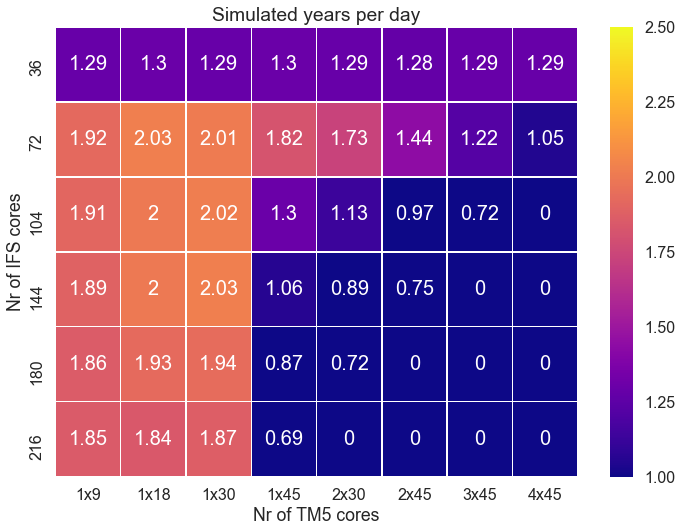

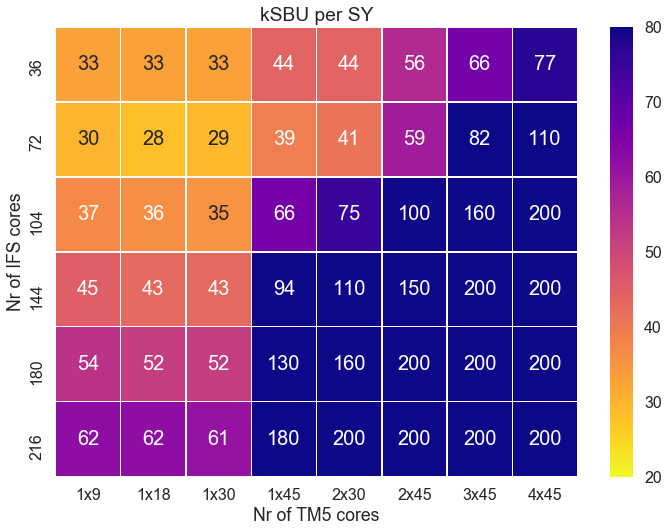

In [7]:
# Figure 6 - Costs
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
plt.style.use('seaborn-poster')
%matplotlib inline

ifs=[36,72,104,144,180,216]
#SYPD for 3 hourly coupling
SY1x9 = [1.29,1.92,1.91,1.89,1.86,1.85]
SY1x18 = [1.30,2.03,2,2,1.93,1.84]
SY1x30 = [1.29,2.01,2.02,2.03,1.94,1.87]
SY1x45 = [1.30,1.82,1.30,1.06,0.87,0.69]
SY2x30 = [1.29,1.73,1.13,0.89,0.72,0]
SY2x45 = [1.28,1.44,0.97,0.75,0,0]
SY3x45 = [1.29,1.22,0.72,0,0,0]
SY4x45 = [1.29,1.05,0,0,0,0]

threehour_SYPD = pd.DataFrame({'1_1x9' : SY1x9,
                           '2_1x18' : SY1x18,
                           '3_1x30' : SY1x30,
                           '4_1x45' : SY1x45,
                           '5_2x30' : SY2x30,
                           '6_2x45' : SY2x45,
                           '7_3x45' : SY3x45,
                           '8_4x45' : SY4x45},index=ifs)
print(threehour_SYPD)

SBU1x9 =  [33,30,37,45,54,62]
SBU1x18 = [33,28,36,43,52,62]
SBU1x30 = [33,29,35,43,52,61]
SBU1x45 = [44,39,66,94,130,180]
SBU2x30 = [44,41,75,110,160,200]
SBU2x45 = [56,59,100,150,200,200]
SBU3x45 = [66,82,160,200,200,200]
SBU4x45 = [77,110,200,200,200,200]

threehour_SBU = pd.DataFrame({'1_1x9' : SBU1x9,
                           '2_1x18' : SBU1x18,
                           '3_1x30' : SBU1x30,
                           '4_1x45' : SBU1x45,
                           '5_2x30' : SBU2x30,
                           '6_2x45' : SBU2x45,
                           '7_3x45' : SBU3x45,
                           '8_4x45' : SBU4x45},index=ifs)
print(threehour_SBU)
xticklabels=['1x9','1x18','1x30','1x45','2x30','2x45','3x45','4x45']

f, (ax1) = plt.subplots(1, 1)
f.set_size_inches(11.7, 8.27)
ax1=sns.heatmap(threehour_SYPD,annot=True, annot_kws={"size": 20},cmap='plasma', fmt='g', linewidths=.5,xticklabels=xticklabels, vmin=1, vmax=2.5)
ax1.set(xlabel='Nr of TM5 cores', ylabel='Nr of IFS cores',title='Simulated years per day')
plt.show()
f, (ax1) = plt.subplots(1, 1)
f.set_size_inches(11.7, 8.27)
ax1=sns.heatmap(threehour_SBU,annot=True, annot_kws={"size": 20},cmap='plasma_r', fmt='g', linewidths=.5,xticklabels=xticklabels, vmin=20, vmax=80)
ax1.set(xlabel='Nr of TM5 cores', ylabel='Nr of IFS cores',title='kSBU per SY')
plt.show()

     1_1x9  2_1x18  3_1x30  4_1x45  5_2x30  6_2x45  7_3x45  8_4x45
36    1.29    1.30    1.29    1.30    1.29    1.28    1.29    1.29
72    1.92    2.03    2.01    1.82    1.73    1.44    1.22    1.05
104   1.91    2.00    2.02    1.30    1.13    0.97    0.72    0.00
144   1.89    2.00    2.03    1.06    0.89    0.75    0.00    0.00
180   1.86    1.93    1.94    0.87    0.72    0.00    0.00    0.00
216   1.85    1.84    1.87    0.69    0.00    0.00    0.00    0.00
     2_1x18  3_1x30  4_1x45  5_2x30  6_2x45  7_3x45  8_4x45
36       35      35      47      46      57      69      80
72       27      27      34      34      40      48      54
104      26      26      31      31      37      41      47
144      26      25      32      34      50      41      79
180      37      35      48      58      77     120     170
216      39      41      66      74     110     160     220


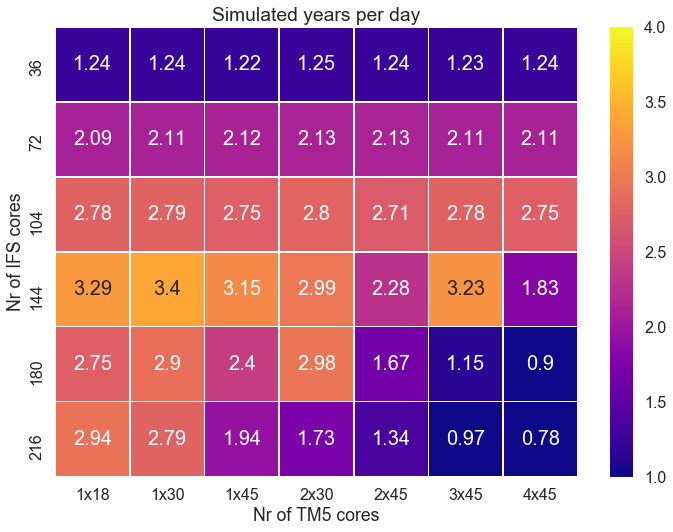

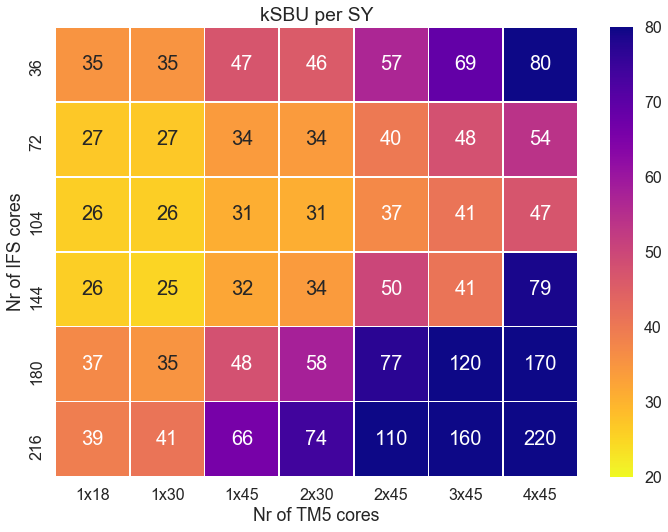

In [8]:
#SYPD for 6 hourly coupling
SY1x18 = [1.24,2.09,2.78,3.29,2.75,2.94]
SY1x30 = [1.24,2.11,2.79,3.40,2.90,2.79]
SY1x45 = [1.22,2.12,2.75,3.15,2.40,1.94]
SY2x30 = [1.25,2.13,2.80,2.99,2.98,1.73]
SY2x45 = [1.24,2.13,2.71,2.28,1.67,1.34]
SY3x45 = [1.23,2.11,2.78,3.23,1.15,0.97]
SY4x45 = [1.24,2.11,2.75,1.83,0.90,0.78]


sixhour_SYPD = pd.DataFrame({'2_1x18' : SY1x18,
                           '3_1x30' : SY1x30,
                           '4_1x45' : SY1x45,
                           '5_2x30' : SY2x30,
                           '6_2x45' : SY2x45,
                           '7_3x45' : SY3x45,
                           '8_4x45' : SY4x45},index=ifs)
print(threehour_SYPD)

#kSBU's for 6 hourly coupling
SBU1x18 = [35,27,26,26,37,39]
SBU1x30 = [35,27,26,25,35,41]
SBU1x45 = [47,34,31,32,48,66]
SBU2x30 = [46,34,31,34,58,74]
SBU2x45 = [57,40,37,50,77,110]
SBU3x45 = [69,48,41,41,120,160]
SBU4x45 = [80,54,47,79,170,220]

sixhour_SBU = pd.DataFrame({'2_1x18' : SBU1x18,
                           '3_1x30' : SBU1x30,
                           '4_1x45' : SBU1x45,
                           '5_2x30' : SBU2x30,
                           '6_2x45' : SBU2x45,
                           '7_3x45' : SBU3x45,
                           '8_4x45' : SBU4x45},index=ifs)
print(sixhour_SBU)
xticklabels6=['1x18','1x30','1x45','2x30','2x45','3x45','4x45']
f, (ax1) = plt.subplots(1, 1)
f.set_size_inches(11.7, 8.27)
ax1=sns.heatmap(sixhour_SYPD,annot=True, annot_kws={"size": 20},cmap='plasma', fmt='g', linewidths=.5,xticklabels=xticklabels6, vmin=1, vmax=4)
ax1.set(xlabel='Nr of TM5 cores', ylabel='Nr of IFS cores',title='Simulated years per day')
plt.show()
f, (ax1) = plt.subplots(1, 1)
f.set_size_inches(11.7, 8.27)
ax1=sns.heatmap(sixhour_SBU,annot=True, annot_kws={"size": 20},cmap='plasma_r', fmt='g', linewidths=.5,xticklabels=xticklabels6, vmin=20, vmax=80)
ax1.set(xlabel='Nr of TM5 cores', ylabel='Nr of IFS cores',title='kSBU per SY')
plt.show()

In [87]:
#N-S profile

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import os,sys
import datetime


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
fnnc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_janstart',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)
            flask_nnc6 = os.path.join(path,'nnc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            flask_nnc6_fh = nc.Dataset(flask_nnc6,mode='r')

            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            fnnc6_obs = np.append(fnnc6_obs,flask_nnc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()
            flask_nnc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'fn1c6_obs': fn1c6_obs*1000000,
                   'fn6c6_obs': fn6c6_obs*1000000,
                   'fndc6_obs': fndc6_obs*1000000,
                   'fn6c3_obs': fn6c3_obs*1000000,
                   'fndc3_obs': fndc3_obs*1000000,
                   'fnfc3_obs': fnfc3_obs*1000000,
                   'fnnc6_obs': fnnc6_obs*1000000,
                   'fn3c3_obs': fn3c3_obs*1000000},index=obs_num)


#Select the timeframe to make the plots
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]

In [88]:
print(df.groupby('H_obs_id').size())

H_obs_id
aircraft-flask        537
aircraft-pfp         3298
shipboard-flask        43
surface-flask        3085
surface-insitu     353669
surface-pfp          2153
tower-insitu       246624
dtype: int64


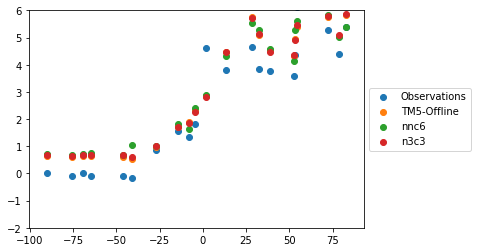

In [110]:
# count_loc = df['I_obs_loc'].value_counts()
# #count_loc[count_loc > 19]
# df_loc = df[df['I_obs_loc'].isin(count_loc[count_loc > 19].index)]

stationlist=df['I_obs_loc'].values
stationlist=list(set(stationlist))
stationlist=['alt','zep','brw','stm','ice','mhd','cba','shm','azr','mid','bme','bmw'
             ,'gmi','chr','eic','asc','sey','smo','cgo','tdf','spo','psa','crz','syo','hba',]
#print(df.loc[df['I_obs_loc'] == 'spo'])
runs=['A_fin_obs','B_fmp_obs','C_fn1c3_obs','fn1c6_obs','fn6c6_obs','fndc6_obs','fn6c3_obs','fndc3_obs','fnfc3_obs','fnnc6_obs','fn3c3_obs']
runnames=['Observations','TM5-Offline','n1c3','n1c6','n6c6','ndc6','n6c3','ndc3','nfc3','nnc6','n3c3']

runs=['A_fin_obs','B_fmp_obs','fnnc6_obs','fn3c3_obs']
runnames=['Observations','TM5-Offline','nnc6','n3c3']

mb_mean=df.groupby(['I_obs_loc']).mean()
mb_mean=mb_mean[mb_mean.index.isin(stationlist)]
mb_std=df.groupby(['I_obs_loc']).std()
mb_std=mb_std[mb_std.index.isin(stationlist)]

for run,runname in zip(runs,runnames):
    #plt.errorbar(mb_mean['E_lat'], mb_mean[run]-mb_mean.loc['spo','A_fin_obs'], yerr=mb_std[run],fmt='o', markersize=3, linewidth=1,label=runname)
    plt.scatter(mb_mean['E_lat'], mb_mean[run]-mb_mean.loc['spo','A_fin_obs'],label=runname)
plt.ylim(-2,6)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [73]:
# Annual mean IPD for selected stations
#N-S profile

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import os,sys
import datetime


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
fnnc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_janstart',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)
            flask_nnc6 = os.path.join(path,'nnc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            flask_nnc6_fh = nc.Dataset(flask_nnc6,mode='r')

            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            fnnc6_obs = np.append(fnnc6_obs,flask_nnc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()
            flask_nnc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'fn1c6_obs': fn1c6_obs*1000000,
                   'fn6c6_obs': fn6c6_obs*1000000,
                   'fndc6_obs': fndc6_obs*1000000,
                   'fn6c3_obs': fn6c3_obs*1000000,
                   'fndc3_obs': fndc3_obs*1000000,
                   'fnfc3_obs': fnfc3_obs*1000000,
                   'fnnc6_obs': fnnc6_obs*1000000,
                   'fn3c3_obs': fn3c3_obs*1000000},index=obs_num)


#Select the timeframe to make the plots
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]
print(df)

            A_fin_obs   B_fmp_obs  C_fn1c3_obs  D_alt      E_lat       F_lon  \
2260339.0  402.901991  405.766448   405.173254  210.0  82.450798  -62.507198   
2465727.0  404.369988  405.479776   405.418599  200.0  82.450798  -62.507198   
2465728.0  404.449995  405.482249   405.406317  200.0  82.450798  -62.507198   
2465729.0  404.499995  405.485567   405.380561  200.0  82.450798  -62.507198   
2465730.0  404.440012  405.492610   405.356521  200.0  82.450798  -62.507198   
2465731.0  404.540013  405.501691   405.335100  200.0  82.450798  -62.507198   
2465732.0  404.590013  405.516184   405.319588  200.0  82.450798  -62.507198   
2465733.0  404.960010  405.532046   405.312050  200.0  82.450798  -62.507198   
2465734.0  405.100000  405.550614   405.312254  200.0  82.450798  -62.507198   
2465735.0  405.160012  405.570841   405.312865  200.0  82.450798  -62.507198   
2465736.0  405.060011  405.592960   405.314931  200.0  82.450798  -62.507198   
2465737.0  404.919992  405.616593   405.

       A_fin_obs  B_fmp_obs  C_fn1c3_obs  fn1c6_obs  fn6c6_obs  fndc6_obs  \
count  25.000000  25.000000    25.000000  25.000000  25.000000  25.000000   
mean    5.338652   5.089137     5.100258   5.043570   5.108828   5.122315   
std     1.181703   0.947601     1.056618   1.036003   1.032480   1.021859   
min     3.905021   3.931664     3.861712   3.848874   3.891444   3.889048   
25%     4.382650   4.402787     4.386056   4.339897   4.409131   4.435958   
50%     5.386629   5.109038     5.071531   5.019771   5.094502   5.144098   
75%     5.547579   5.237186     5.190766   5.120786   5.220657   5.243774   
max     7.453833   6.765008     6.991225   6.888522   6.928404   6.898695   

       fn6c3_obs  fndc3_obs  fnfc3_obs  fnnc6_obs  fn3c3_obs  
count  25.000000  25.000000  25.000000  25.000000  25.000000  
mean    5.163035   5.153438   5.758898   4.682563   5.138284  
std     1.045545   1.040103   1.201193   0.828753   1.044125  
min     3.916225   3.894400   4.335845   3.306515   3.

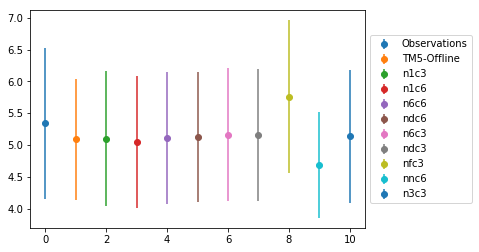

In [67]:
# Calculate (annual) mean of all stations
df_mean=df.groupby(['I_obs_loc']).mean()

# Select stations for Northern and Southern Hemisphere
NH=df_mean.loc[['alt','brw','zep','sum','pal'],:] #ice not in this dataset
SH=df_mean.loc[['spo','hba','syo','psa','cgo'],:] # tdf idem 

# Specify runnames and labelnames
runs=['A_fin_obs','B_fmp_obs','C_fn1c3_obs','fn1c6_obs','fn6c6_obs','fndc6_obs','fn6c3_obs','fndc3_obs','fnfc3_obs','fnnc6_obs','fn3c3_obs']
runnames=['Observations','TM5-Offline','n1c3','n1c6','n6c6','ndc6','n6c3','ndc3','nfc3','nnc6','n3c3']



# Create empty dataframe for results
results = pd.DataFrame()

for run in runs:
    for NH_station in NH.index:
        for SH_station in SH.index:
            # Specify indexstring for index dataframe
            indexstring=str(NH_station)+' minus '+str(SH_station)
            # Subtract SH from NH for each station and store results in results DataFrame
            results.loc[indexstring,run]=NH.loc[NH_station,run]-SH.loc[SH_station,run]
        
# Calculate mean and std for each modelrun
stats=results.describe()
print(stats)

for index,(run,runname) in enumerate(zip(runs,runnames)):
    plt.errorbar(index, stats.loc['mean',run],yerr=stats.loc['std',run],fmt='o', label=runname)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

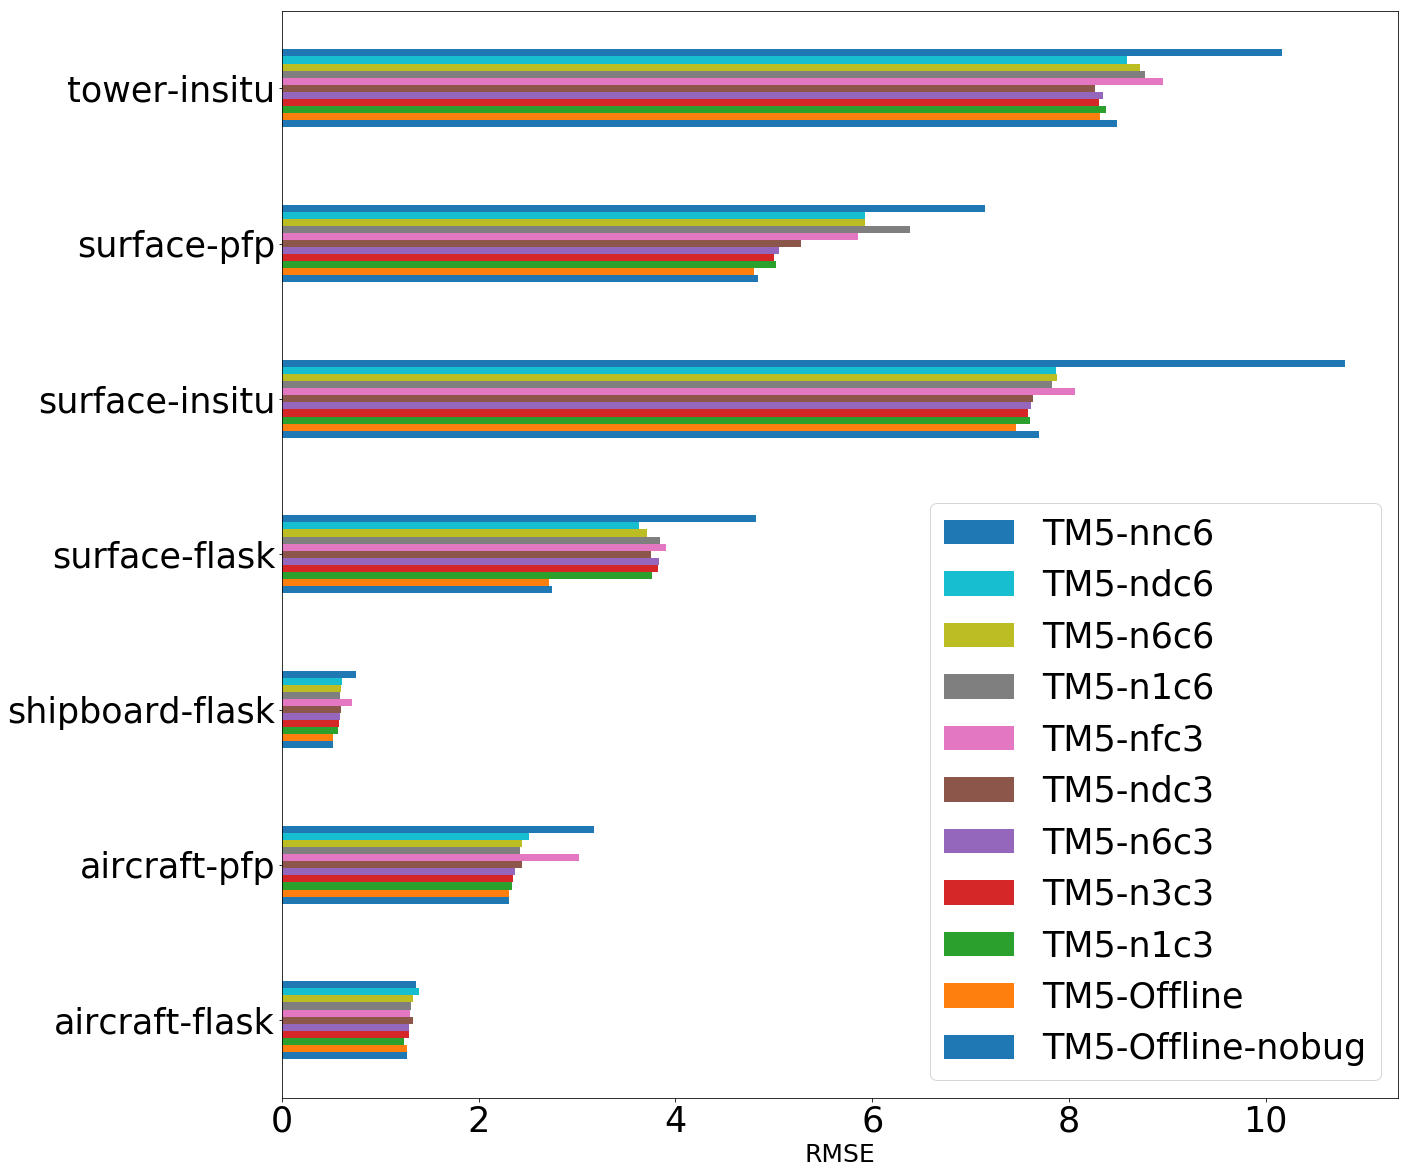

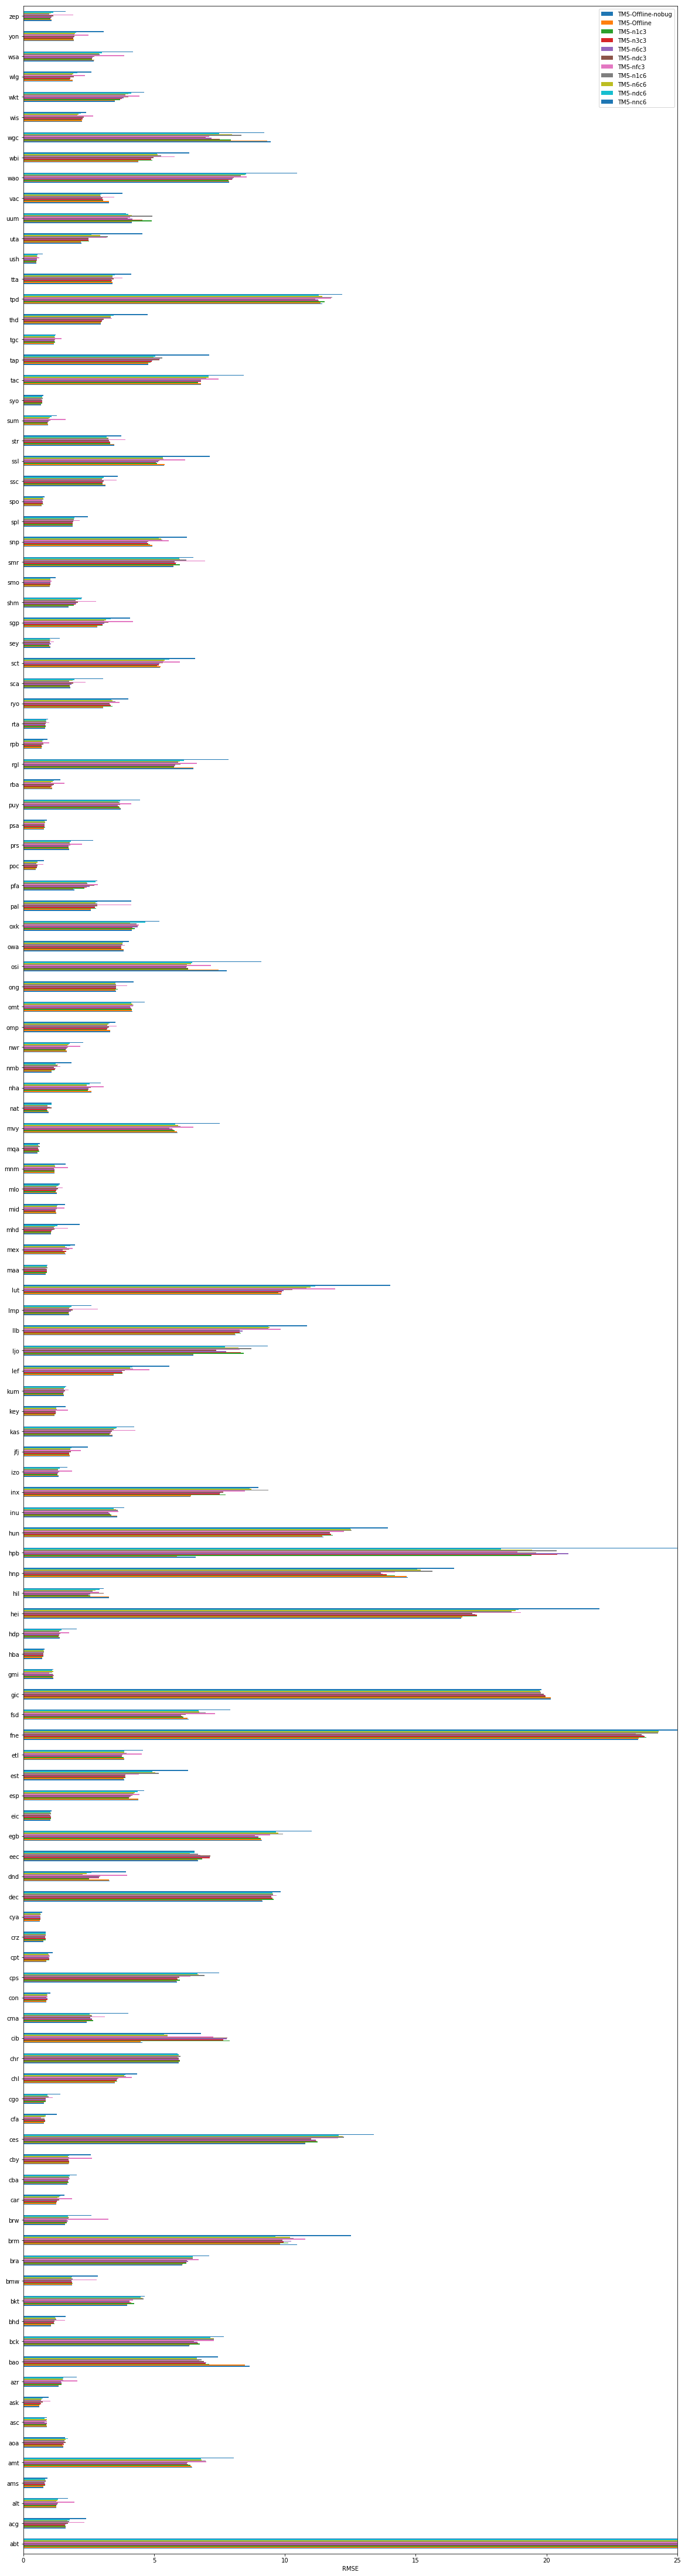

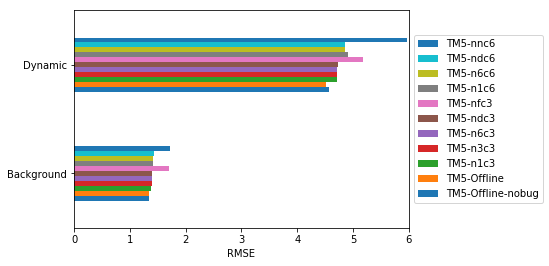

In [140]:
# Figure 5 - RMSE barplots
#6 Bar charts with the RMSE of the different stations and different type. 
#  Code extension allows to easily switch the timeseries graph for any chosen station.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import os,sys
import datetime


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fnb_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
fnnc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_janstart',TM5_MP_filename) 
            flask_nobug = os.path.join(path,'TM5_offline_nobug',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)
            flask_nnc6 = os.path.join(path,'nnc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_nobug_fh = nc.Dataset(flask_nobug,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            flask_nnc6_fh = nc.Dataset(flask_nnc6,mode='r')

            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fnb_obs0 = np.append(fnb_obs0,flask_nobug_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            fnnc6_obs = np.append(fnnc6_obs,flask_nnc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_nobug_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()
            flask_nnc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'fnobug_obs' : fnb_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'fn1c6_obs': fn1c6_obs*1000000,
                   'fn6c6_obs': fn6c6_obs*1000000,
                   'fndc6_obs': fndc6_obs*1000000,
                   'fn6c3_obs': fn6c3_obs*1000000,
                   'fndc3_obs': fndc3_obs*1000000,
                   'fnfc3_obs': fnfc3_obs*1000000,
                   'fnnc6_obs': fnnc6_obs*1000000,
                   'fn3c3_obs': fn3c3_obs*1000000},index=obs_num)


#Select the timeframe to make the plots
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]

# # Only select the afternoon hours (12.00-16.59) for the plot/analysis
# df['G_date'] += pd.to_timedelta(np.around(df['F_lon']/15), unit='h')
# df = df[(df.G_date.dt.hour >= 12) & (df.G_date.dt.hour <17)]


#remove values with too high observations
df = df[df.A_fin_obs<500]
#calculate difference between models and observations and square it
df['J_TM5_offline'] = (df['B_fmp_obs']-df['A_fin_obs'])**2
df['T_TM5_nobug'] = (df['fnobug_obs']-df['A_fin_obs'])**2
df['K_TM5_n1c3'] = (df['C_fn1c3_obs']-df['A_fin_obs'])**2
df['L_TM5_n6c3'] = (df['fn6c3_obs']-df['A_fin_obs'])**2
df['M_TM5_ndc3'] = (df['fndc3_obs']-df['A_fin_obs'])**2
df['N_TM5_n1c6'] = (df['fn1c6_obs']-df['A_fin_obs'])**2
df['O_TM5_n6c6'] = (df['fn6c6_obs']-df['A_fin_obs'])**2
df['P_TM5_ndc6'] = (df['fndc6_obs']-df['A_fin_obs'])**2
df['Q_TM5_n3c3'] = (df['fn3c3_obs']-df['A_fin_obs'])**2
df['R_TM5_nfc3'] = (df['fnfc3_obs']-df['A_fin_obs'])**2
df['S_TM5_nnc6'] = (df['fnnc6_obs']-df['A_fin_obs'])**2

#calculation of RMSE for the types of measurements
#group the difference(column-J) by type and give the mean and the count, two dataframes, Offline and ESM
sample_type_off = df['J_TM5_offline'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c3 = df['K_TM5_n1c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c3 = df['L_TM5_n6c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc3 = df['M_TM5_ndc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c6 = df['N_TM5_n1c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c6 = df['O_TM5_n6c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc6 = df['P_TM5_ndc6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n3c3 = df['Q_TM5_n3c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nfc3 = df['R_TM5_nfc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nnc6 = df['S_TM5_nnc6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nobug = df['T_TM5_nobug'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
#Merge the two dataframes together - All lines
# pieces_type = [sample_type_off,sample_type_off_new,sample_type_n1c3,sample_type_n3c3,sample_type_n6c3,sample_type_ndc3,sample_type_nfc3,sample_type_n1c6,sample_type_n6c6,sample_type_ndc6]
# sample_type=pd.concat(pieces_type,keys=['TM5-Offline','TM5-Offline_new','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])
#Merge the two dataframes together - Selection of lines
pieces_type = [sample_type_nobug,sample_type_off,sample_type_n1c3,sample_type_n3c3,sample_type_n6c3,sample_type_ndc3,sample_type_nfc3,sample_type_n1c6,sample_type_n6c6,sample_type_ndc6,sample_type_nnc6]
sample_type=pd.concat(pieces_type,keys=['TM5-Offline-nobug','TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6','TM5-nnc6'])
#Calculate the RMSE by giving the sqrt of the mean (mean was the square of the differences for each type)
sample_type['RMSE']=np.sqrt(sample_type['mean'])

#calculation of RMSE of the different locations of measurement, see above for method
#Use only stations with 20 or more measurements
count_loc = df['I_obs_loc'].value_counts()
count_loc[count_loc > 19]
df_loc = df[df['I_obs_loc'].isin(count_loc[count_loc > 19].index)]
sample_loc_off = df_loc['J_TM5_offline'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c3 = df_loc['K_TM5_n1c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c3 = df_loc['L_TM5_n6c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc3 = df_loc['M_TM5_ndc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c6 = df_loc['N_TM5_n1c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c6 = df_loc['O_TM5_n6c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc6 = df_loc['P_TM5_ndc6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n3c3 = df_loc['Q_TM5_n3c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nfc3 = df_loc['R_TM5_nfc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nnc6 = df_loc['S_TM5_nnc6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nobug = df_loc['T_TM5_nobug'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
# Setup for the all the types
# pieces_loc = [sample_loc_off,sample_loc_off_new,sample_loc_n1c3,sample_loc_n3c3,sample_loc_n6c3,sample_loc_ndc3,sample_loc_nfc3,sample_loc_n1c6,sample_loc_n6c6,sample_loc_ndc6]
# sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-Offline_new','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])

# Different lines, pay attention to the order!
pieces_loc = [sample_loc_nobug,sample_loc_off,sample_loc_n1c3,sample_loc_n3c3,sample_loc_n6c3,sample_loc_ndc3,sample_loc_nfc3,sample_loc_n1c6,sample_loc_n6c6,sample_loc_ndc6,sample_loc_nnc6]
sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline-nobug','TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6','TM5-nnc6'])

sample_loc['RMSE']=np.sqrt(sample_loc['mean'])


#Plot the dataframes in barplots. First unstack them, keeping only the RMSE
plot_type=sample_type['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax1 = plot_type.plot.barh(figsize=(20,20),title='',fontsize=25,legend=False)
handles, labels = ax1.get_legend_handles_labels()
lgd=ax1.legend(handles[::-1], labels[::-1],loc='lower right', markerscale = 5,fontsize='35')
ax1.set_xlabel("RMSE",fontsize=25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
#plt.savefig('BBOS - RMSE_type.png',dpi=300)

plot_loc=sample_loc['RMSE'].unstack(level=0)
plot_loc.index.name = ''
ax2 = plot_loc.plot.barh(figsize=(20,80))
ax2.set_xlabel("RMSE")
plt.xlim(0,25)
#plt.savefig('RMSE_stations.png',dpi=300)
plt.show()

# Select background stations and non background stations
stationlist=['alt','zep','brw','stm','ice','mhd','cba','shm','azr','mid','bme','bmw'
             ,'gmi','chr','eic','asc','sey','smo','cgo','tdf','spo','psa','crz','syo','hba',]

# Distribute stations in background or dynamic category depending on their occurence in the stationlist
background=plot_loc[plot_loc.index.isin(stationlist)]
dynamic=plot_loc[~plot_loc.index.isin(stationlist)]

# Create dataframe with 'background'/'dynamic' as index and the mean RSME per run as values.
backgroundplot_df=pd.DataFrame()
for index in dynamic.mean().index:
    backgroundplot_df.loc['Background',index]=background.mean().loc[index]
    backgroundplot_df.loc['Dynamic',index]=dynamic.mean().loc[index]

# Plot DataFrame as two sets of barplots
ax3 = backgroundplot_df.plot.barh()
ax3.set_xlabel("RMSE")

ax3.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,6)
#plt.savefig('RMSE_stations.png',dpi=300)
plt.show()

In [1]:
# Figure 5 - RMSE barplots
#6 Bar charts with the RMSE of the different stations and different type. 
#  Code extension allows to easily switch the timeseries graph for any chosen station.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import os,sys
import datetime


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
modeldatamismatch = []
fmp_obs0 = []
fnb_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
fnnc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_janstart',TM5_MP_filename) 
            flask_nobug = os.path.join(path,'TM5_offline_nobug',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)
            flask_nnc6 = os.path.join(path,'nnc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_nobug_fh = nc.Dataset(flask_nobug,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            flask_nnc6_fh = nc.Dataset(flask_nnc6,mode='r')

            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            modeldatamismatch = np.append(modeldatamismatch,flask_in_fh.variables['modeldatamismatch'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fnb_obs0 = np.append(fnb_obs0,flask_nobug_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            fnnc6_obs = np.append(fnnc6_obs,flask_nnc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_nobug_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()
            flask_nnc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'fnobug_obs' : fnb_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'modeldatamismatch' : modeldatamismatch*1000000,
                   'fn1c6_obs': fn1c6_obs*1000000,
                   'fn6c6_obs': fn6c6_obs*1000000,
                   'fndc6_obs': fndc6_obs*1000000,
                   'fn6c3_obs': fn6c3_obs*1000000,
                   'fndc3_obs': fndc3_obs*1000000,
                   'fnfc3_obs': fnfc3_obs*1000000,
                   'fnnc6_obs': fnnc6_obs*1000000,
                   'fn3c3_obs': fn3c3_obs*1000000},index=obs_num)

In [2]:
path='/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/CTDAS'

obs_num_CTDAS=[]
CTDAS=[]
for root, dirs, files in os.walk(path):
    for file in sorted(files):
        CTDAS_fh=nc.Dataset(os.path.join(path,file),mode='r')
        obs_num_CTDAS=np.append(obs_num_CTDAS,CTDAS_fh.variables['obs_num'][:])
        CTDAS=np.append(CTDAS,CTDAS_fh.variables['flask'][:,0])
        CTDAS_fh.close()


CTDAS_df=pd.DataFrame({'CTDAS':CTDAS*1000000},index=obs_num_CTDAS)
print(np.shape(CTDAS_df),np.shape(df))


CTDAS_df=CTDAS_df[~CTDAS_df.index.duplicated(keep='first')]
df=df[~df.index.duplicated(keep='first')]
print(np.shape(CTDAS_df),np.shape(df))

df=df.merge(CTDAS_df,how='outer',left_index=True,right_index=True)
df=df[np.isfinite(df['A_fin_obs'])]
print(np.shape(CTDAS_df),np.shape(df))

# for i in CTDAS_df.index:
#     if i in df.index:
#         try:
#             df.loc[i,'CTDAS']=CTDAS_df.loc[i,'CTDAS']
#         except ValueError:
#             print(i)

#Select the timeframe to make the plots
print(np.shape(CTDAS_df),np.shape(df))
df = df[(df.G_date>'2014-01-01') & (df.G_date<'2015-01-01')]
print(np.shape(CTDAS_df),np.shape(df))
print(df.loc[1541.0,:])

(600455, 1) (609472, 19)
(597024, 1) (585570, 19)
(597024, 1) (585570, 20)
(597024, 1) (585570, 20)
(597024, 1) (585507, 20)
A_fin_obs                         403.58
B_fmp_obs                        404.696
C_fn1c3_obs                      404.886
D_alt                                195
E_lat                            82.4508
F_lon                           -62.5072
G_date               2014-01-02 20:03:00
H_obs_id                   surface-flask
I_obs_loc                            alt
fn1c6_obs                        404.433
fn3c3_obs                        404.837
fn6c3_obs                        404.829
fn6c6_obs                        404.486
fndc3_obs                        404.736
fndc6_obs                        404.307
fnfc3_obs                        404.391
fnnc6_obs                        403.312
fnobug_obs                       404.696
modeldatamismatch                   1000
CTDAS                            403.022
Name: 1541.0, dtype: object


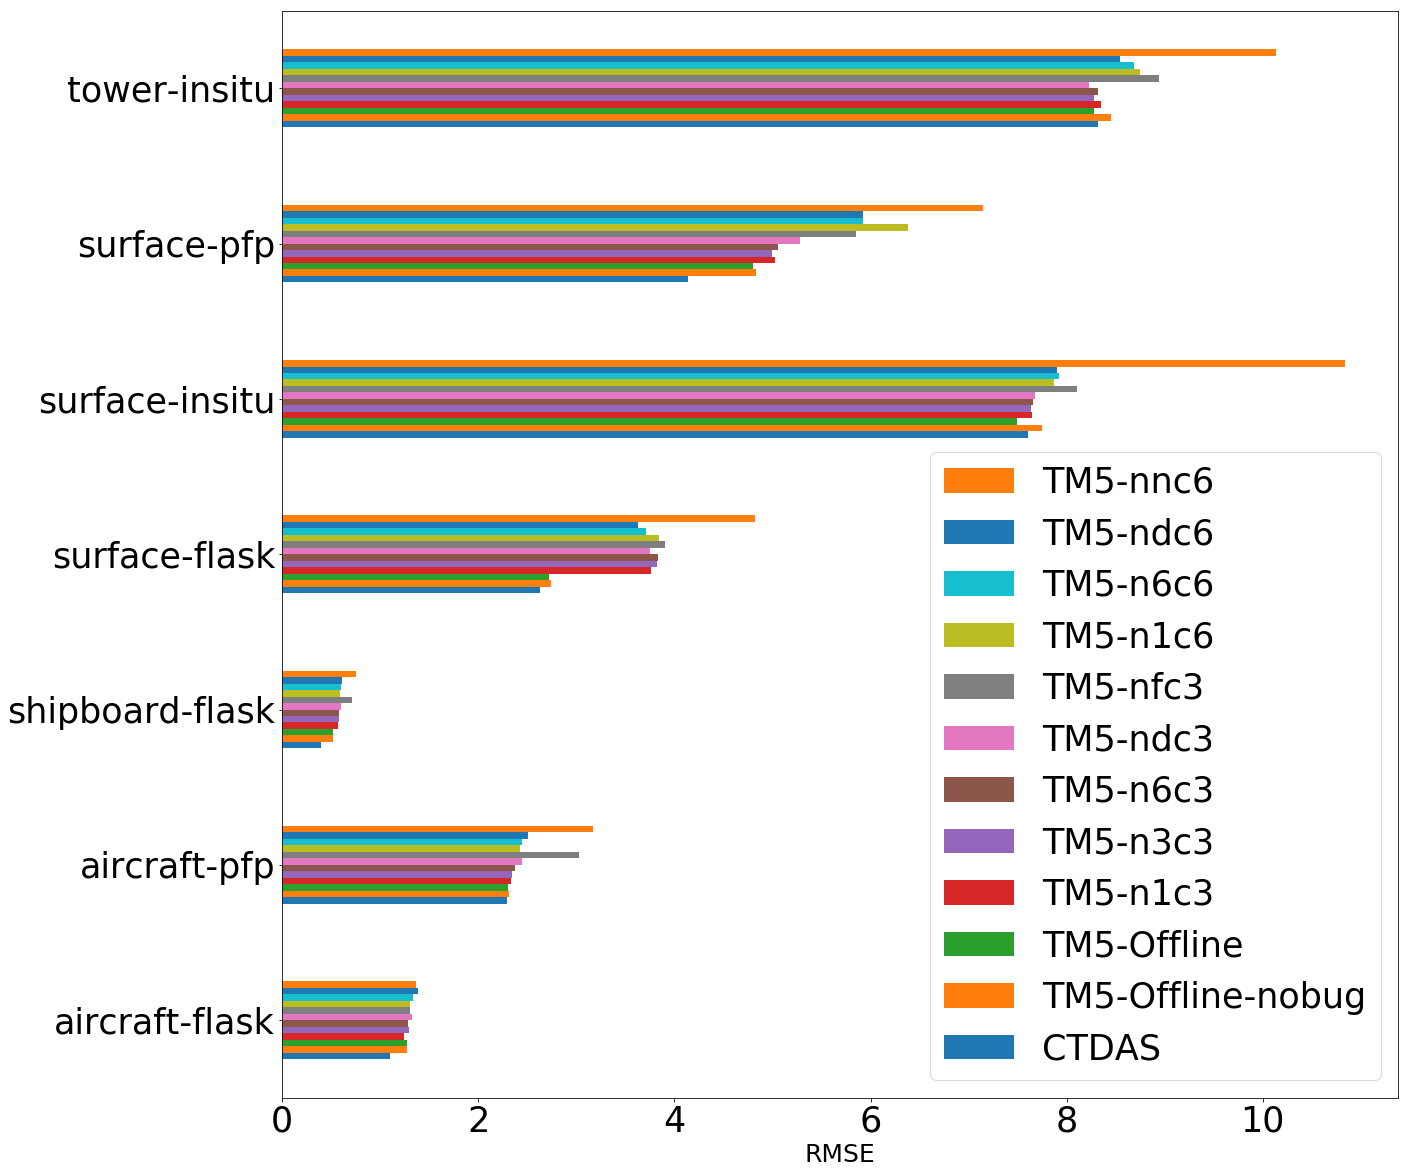

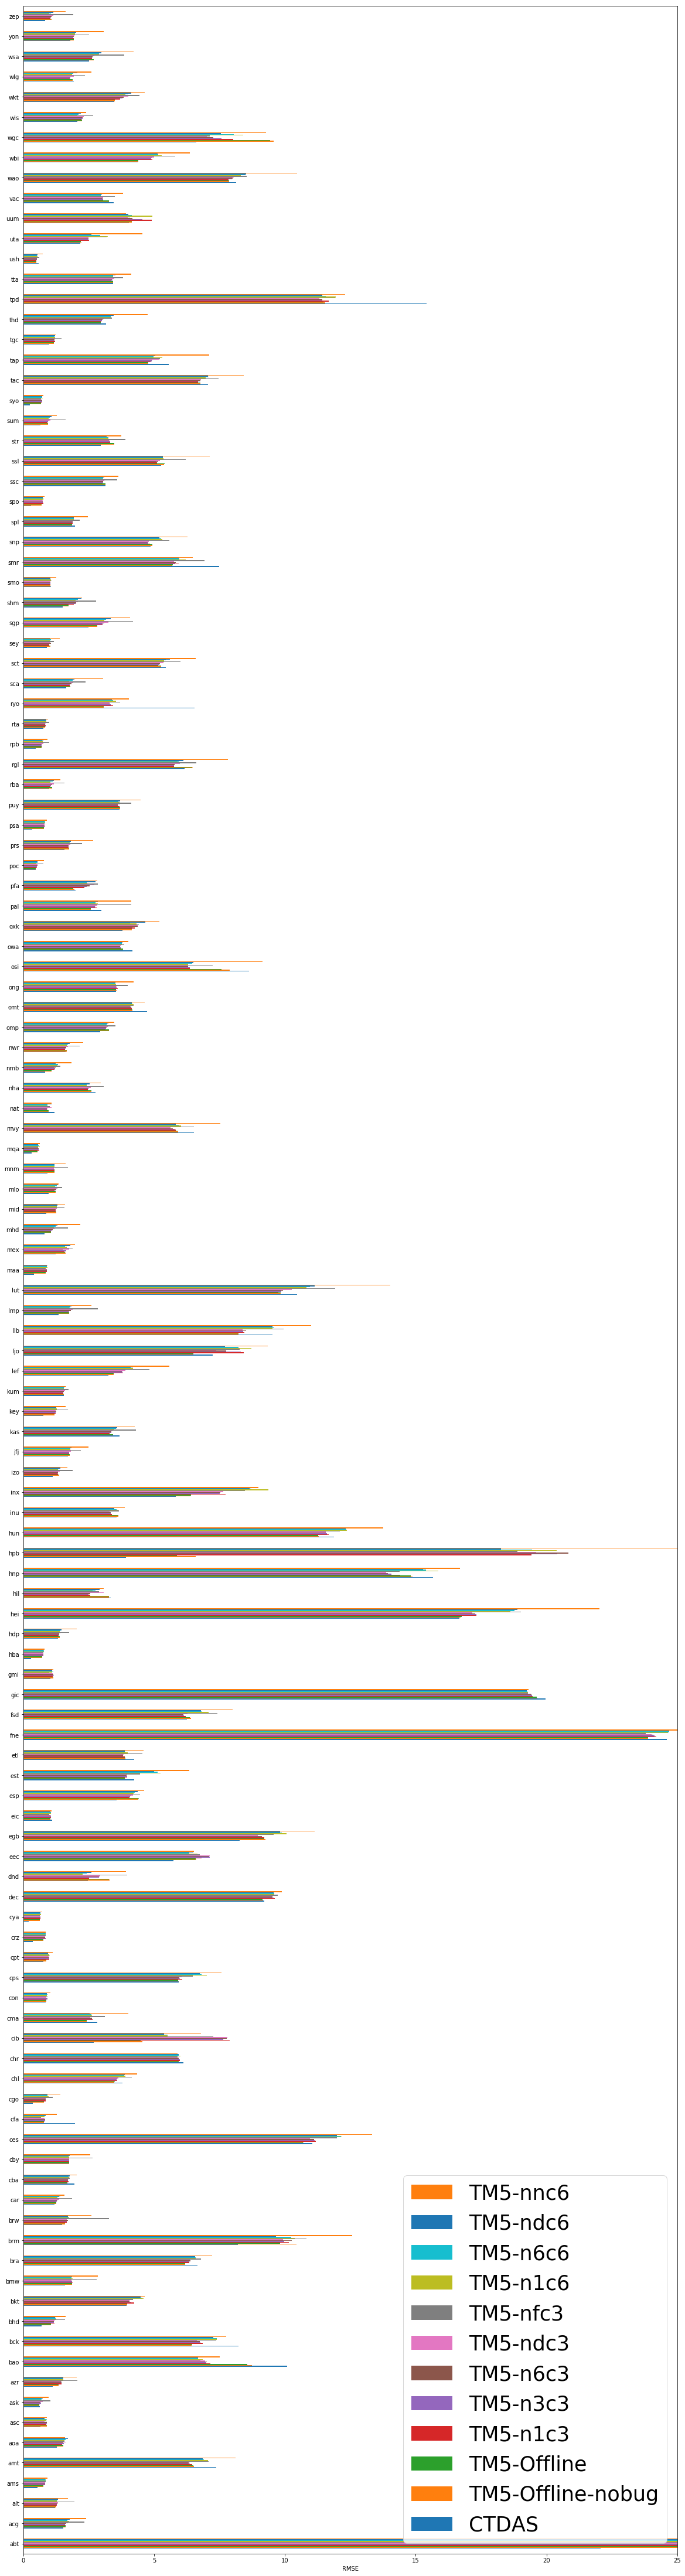

               CTDAS  TM5-Offline-nobug  TM5-Offline  TM5-n1c3  TM5-n3c3  \
Background  1.150414           1.350749     1.350499  1.387486  1.392555   
Dynamic     4.557857           4.586889     4.531239  4.730250  4.720601   

            TM5-n6c3  TM5-ndc3  TM5-nfc3  TM5-n1c6  TM5-n6c6  TM5-ndc6  \
Background  1.396876  1.399905  1.705521  1.413963  1.419017  1.427210   
Dynamic     4.724350  4.738409  5.186609  4.917932  4.873397  4.870183   

            TM5-nnc6  
Background  1.718124  
Dynamic     5.973985  


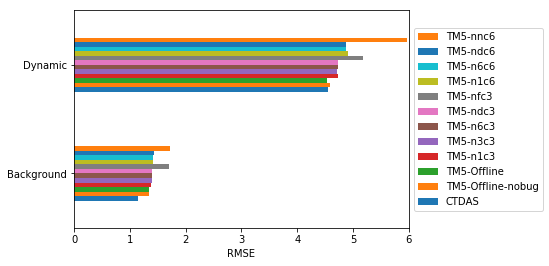

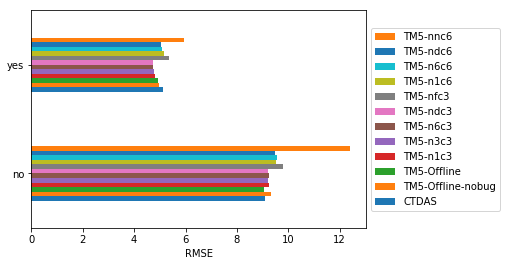

In [70]:
#remove values with too high observations
df = df[df.A_fin_obs<500]

df['assimilated'] = np.where(df['modeldatamismatch']>=1000, 'no', 'yes')

#calculate difference between models and observations and square it
df['J_TM5_offline'] = (df['B_fmp_obs']-df['A_fin_obs'])**2
df['T_TM5_nobug'] = (df['fnobug_obs']-df['A_fin_obs'])**2
df['K_TM5_n1c3'] = (df['C_fn1c3_obs']-df['A_fin_obs'])**2
df['L_TM5_n6c3'] = (df['fn6c3_obs']-df['A_fin_obs'])**2
df['M_TM5_ndc3'] = (df['fndc3_obs']-df['A_fin_obs'])**2
df['N_TM5_n1c6'] = (df['fn1c6_obs']-df['A_fin_obs'])**2
df['O_TM5_n6c6'] = (df['fn6c6_obs']-df['A_fin_obs'])**2
df['P_TM5_ndc6'] = (df['fndc6_obs']-df['A_fin_obs'])**2
df['Q_TM5_n3c3'] = (df['fn3c3_obs']-df['A_fin_obs'])**2
df['R_TM5_nfc3'] = (df['fnfc3_obs']-df['A_fin_obs'])**2
df['S_TM5_nnc6'] = (df['fnnc6_obs']-df['A_fin_obs'])**2
df['CTDAS_error'] = (df['CTDAS']-df['A_fin_obs'])**2

#calculation of RMSE for the types of measurements
#group the difference(column-J) by type and give the mean and the count, two dataframes, Offline and ESM
sample_type_off = df['J_TM5_offline'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c3 = df['K_TM5_n1c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c3 = df['L_TM5_n6c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc3 = df['M_TM5_ndc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n1c6 = df['N_TM5_n1c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n6c6 = df['O_TM5_n6c6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ndc6 = df['P_TM5_ndc6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_n3c3 = df['Q_TM5_n3c3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nfc3 = df['R_TM5_nfc3'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nnc6 = df['S_TM5_nnc6'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_nobug = df['T_TM5_nobug'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_ctdas = df['CTDAS_error'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
#Merge the two dataframes together - All lines
# pieces_type = [sample_type_off,sample_type_off_new,sample_type_n1c3,sample_type_n3c3,sample_type_n6c3,sample_type_ndc3,sample_type_nfc3,sample_type_n1c6,sample_type_n6c6,sample_type_ndc6]
# sample_type=pd.concat(pieces_type,keys=['TM5-Offline','TM5-Offline_new','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])
#Merge the two dataframes together - Selection of lines
pieces_type = [sample_type_ctdas,sample_type_nobug,sample_type_off,sample_type_n1c3,sample_type_n3c3,sample_type_n6c3,sample_type_ndc3,sample_type_nfc3,sample_type_n1c6,sample_type_n6c6,sample_type_ndc6,sample_type_nnc6]
sample_type=pd.concat(pieces_type,keys=['CTDAS','TM5-Offline-nobug','TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6','TM5-nnc6'])
#Calculate the RMSE by giving the sqrt of the mean (mean was the square of the differences for each type)
sample_type['RMSE']=np.sqrt(sample_type['mean'])

#calculation of RMSE of the different locations of measurement, see above for method
#Use only stations with 20 or more measurements
count_loc = df['I_obs_loc'].value_counts()
count_loc[count_loc > 19]
df_loc = df[df['I_obs_loc'].isin(count_loc[count_loc > 19].index)]
sample_loc_off = df_loc['J_TM5_offline'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c3 = df_loc['K_TM5_n1c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c3 = df_loc['L_TM5_n6c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc3 = df_loc['M_TM5_ndc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n1c6 = df_loc['N_TM5_n1c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n6c6 = df_loc['O_TM5_n6c6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ndc6 = df_loc['P_TM5_ndc6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_n3c3 = df_loc['Q_TM5_n3c3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nfc3 = df_loc['R_TM5_nfc3'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nnc6 = df_loc['S_TM5_nnc6'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_nobug = df_loc['T_TM5_nobug'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_ctdas = df_loc['CTDAS_error'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
# Setup for the all the types
# pieces_loc = [sample_loc_off,sample_loc_off_new,sample_loc_n1c3,sample_loc_n3c3,sample_loc_n6c3,sample_loc_ndc3,sample_loc_nfc3,sample_loc_n1c6,sample_loc_n6c6,sample_loc_ndc6]
# sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-Offline_new','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])

# Different lines, pay attention to the order!
pieces_loc = [sample_loc_ctdas,sample_loc_nobug,sample_loc_off,sample_loc_n1c3,sample_loc_n3c3,sample_loc_n6c3,sample_loc_ndc3,sample_loc_nfc3,sample_loc_n1c6,sample_loc_n6c6,sample_loc_ndc6,sample_loc_nnc6]
sample_loc=pd.concat(pieces_loc,keys=['CTDAS','TM5-Offline-nobug','TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6','TM5-nnc6'])

sample_loc['RMSE']=np.sqrt(sample_loc['mean'])

# RMSE for assimilated or not
sample_assimilated_off = df['J_TM5_offline'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_n1c3 = df['K_TM5_n1c3'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_n6c3 = df['L_TM5_n6c3'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_ndc3 = df['M_TM5_ndc3'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_n1c6 = df['N_TM5_n1c6'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_n6c6 = df['O_TM5_n6c6'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_ndc6 = df['P_TM5_ndc6'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_n3c3 = df['Q_TM5_n3c3'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_nfc3 = df['R_TM5_nfc3'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_nnc6 = df['S_TM5_nnc6'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_nobug = df['T_TM5_nobug'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
sample_assimilated_ctdas = df['CTDAS_error'].groupby(df['assimilated']).agg({'mean':np.mean,'count':"count"})
# Setup for the all the types
# pieces_loc = [sample_assimilated_off,sample_assimilated_off_new,sample_assimilated_n1c3,sample_assimilated_n3c3,sample_assimilated_n6c3,sample_assimilated_ndc3,sample_assimilated_nfc3,sample_assimilated_n1c6,sample_assimilated_n6c6,sample_assimilated_ndc6]
# sample_assimilated=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-Offline_new','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6'])

# Different lines, pay attention to the order!
pieces_assimilated = [sample_assimilated_ctdas,sample_assimilated_nobug,sample_assimilated_off,sample_assimilated_n1c3,sample_assimilated_n3c3,sample_assimilated_n6c3,sample_assimilated_ndc3,sample_assimilated_nfc3,sample_assimilated_n1c6,sample_assimilated_n6c6,sample_assimilated_ndc6,sample_assimilated_nnc6]
sample_assimilated=pd.concat(pieces_assimilated,keys=['CTDAS','TM5-Offline-nobug','TM5-Offline','TM5-n1c3','TM5-n3c3','TM5-n6c3','TM5-ndc3','TM5-nfc3','TM5-n1c6','TM5-n6c6','TM5-ndc6','TM5-nnc6'])

sample_assimilated['RMSE']=np.sqrt(sample_assimilated['mean'])


#Plot the dataframes in barplots. First unstack them, keeping only the RMSE
plot_type=sample_type['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax1 = plot_type.plot.barh(figsize=(20,20),title='',fontsize=25,legend=False)
handles, labels = ax1.get_legend_handles_labels()
lgd=ax1.legend(handles[::-1], labels[::-1],loc='lower right', markerscale = 5,fontsize='35')
ax1.set_xlabel("RMSE",fontsize=25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
#plt.savefig('BBOS - RMSE_type.png',dpi=300)

plot_loc=sample_loc['RMSE'].unstack(level=0)
plot_loc.index.name = ''
ax2 = plot_loc.plot.barh(figsize=(20,80))
ax2.set_xlabel("RMSE")
handles, labels = ax2.get_legend_handles_labels()
lgd=ax2.legend(handles[::-1], labels[::-1],loc='lower right', markerscale = 5,fontsize='35')
plt.xlim(0,25)
#plt.savefig('RMSE_stations.png',dpi=300)
plt.show()

# Select background stations and non background stations
stationlist=['alt','zep','brw','stm','ice','mhd','cba','shm','azr','mid','bme','bmw'
             ,'gmi','chr','eic','asc','sey','smo','cgo','tdf','spo','psa','crz','syo','hba',]

# Distribute stations in background or dynamic category depending on their occurence in the stationlist
background=plot_loc[plot_loc.index.isin(stationlist)]
dynamic=plot_loc[~plot_loc.index.isin(stationlist)]

# Create dataframe with 'background'/'dynamic' as index and the mean RSME per run as values.
backgroundplot_df=pd.DataFrame()
for index in dynamic.mean().index:
    backgroundplot_df.loc['Background',index]=background.mean().loc[index]
    backgroundplot_df.loc['Dynamic',index]=dynamic.mean().loc[index]
print(backgroundplot_df)

# Plot DataFrame as two sets of barplots
ax3 = backgroundplot_df.plot.barh()
ax3.set_xlabel("RMSE")

ax3.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,6)
#plt.savefig('RMSE_stations.png',dpi=300)
plt.show()

plot_assimilated=sample_assimilated['RMSE'].unstack(level=0)
plot_assimilated.index.name = ''
ax4 = plot_assimilated.plot.barh()
ax4.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1, 0.5))
ax4.set_xlabel("RMSE")
#plt.xlim(0,25)
#plt.savefig('RMSE_stations.png',dpi=300)
plt.show()

aircraft-flask
aircraft-pfp
shipboard-flask
surface-flask
surface-insitu
surface-pfp
tower-insitu
CTDAS
TM5-Offline-nobug
TM5-Offline
TM5-n1c3
TM5-n3c3
TM5-n6c3
TM5-ndc3
TM5-nfc3
TM5-n1c6
TM5-n6c6
TM5-ndc6
TM5-nnc6
               TM5-Offline  TM5-n6c3  TM5-n6c6  TM5-nfc3   TM5-nnc6
aircraft-pfp      2.306926  2.371179  2.442123  3.023919   3.173513
surface-flask     2.716777  3.837913  3.707289  3.906374   4.822104
tower-insitu      8.280837  8.315604  8.689571  8.939913  10.135237


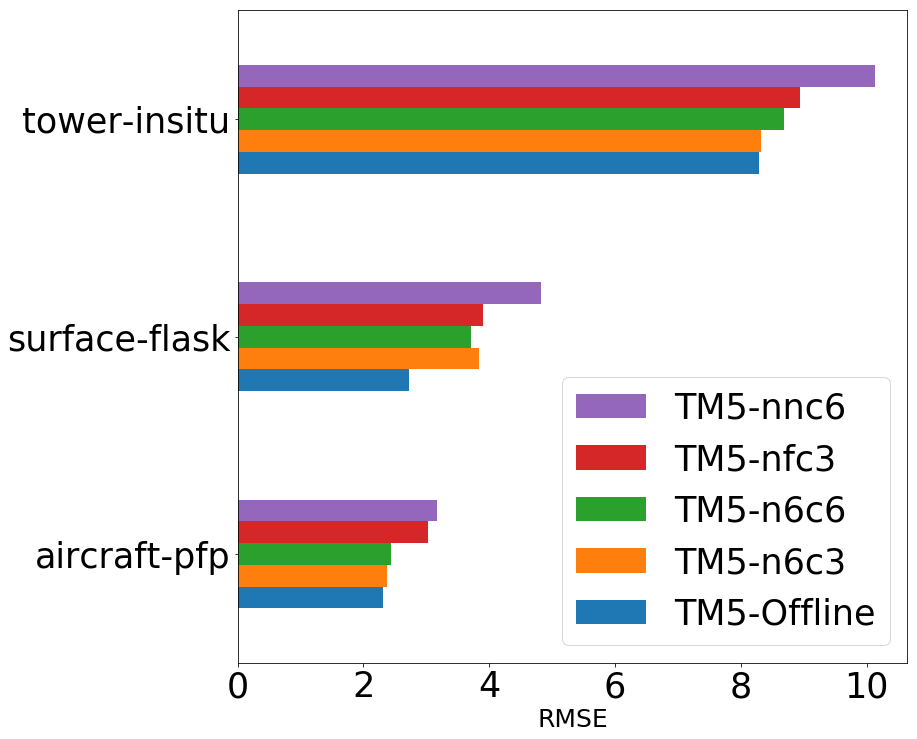

In [89]:
finalfigure_plot_type= pd.DataFrame()

for index in plot_type.index:
    print(index)
for column in plot_type.columns:
    print(column)
    
# Select columns and figures to put in final figure
columnlist = ['TM5-Offline','TM5-n6c3','TM5-n6c6','TM5-nfc3','TM5-nnc6']
indexlist = ['aircraft-pfp','surface-flask','tower-insitu']
for index in indexlist:
    for column in columnlist:
        finalfigure_plot_type.loc[index,column]=plot_type.loc[index,column]

print(finalfigure_plot_type)

ax1 = finalfigure_plot_type.plot.barh(figsize=(12,12),title='',fontsize=25,legend=False)
handles, labels = ax1.get_legend_handles_labels()
lgd=ax1.legend(handles[::-1], labels[::-1],loc='lower right', markerscale = 5,fontsize='35')
ax1.set_xlabel("RMSE",fontsize=25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
plt.show()

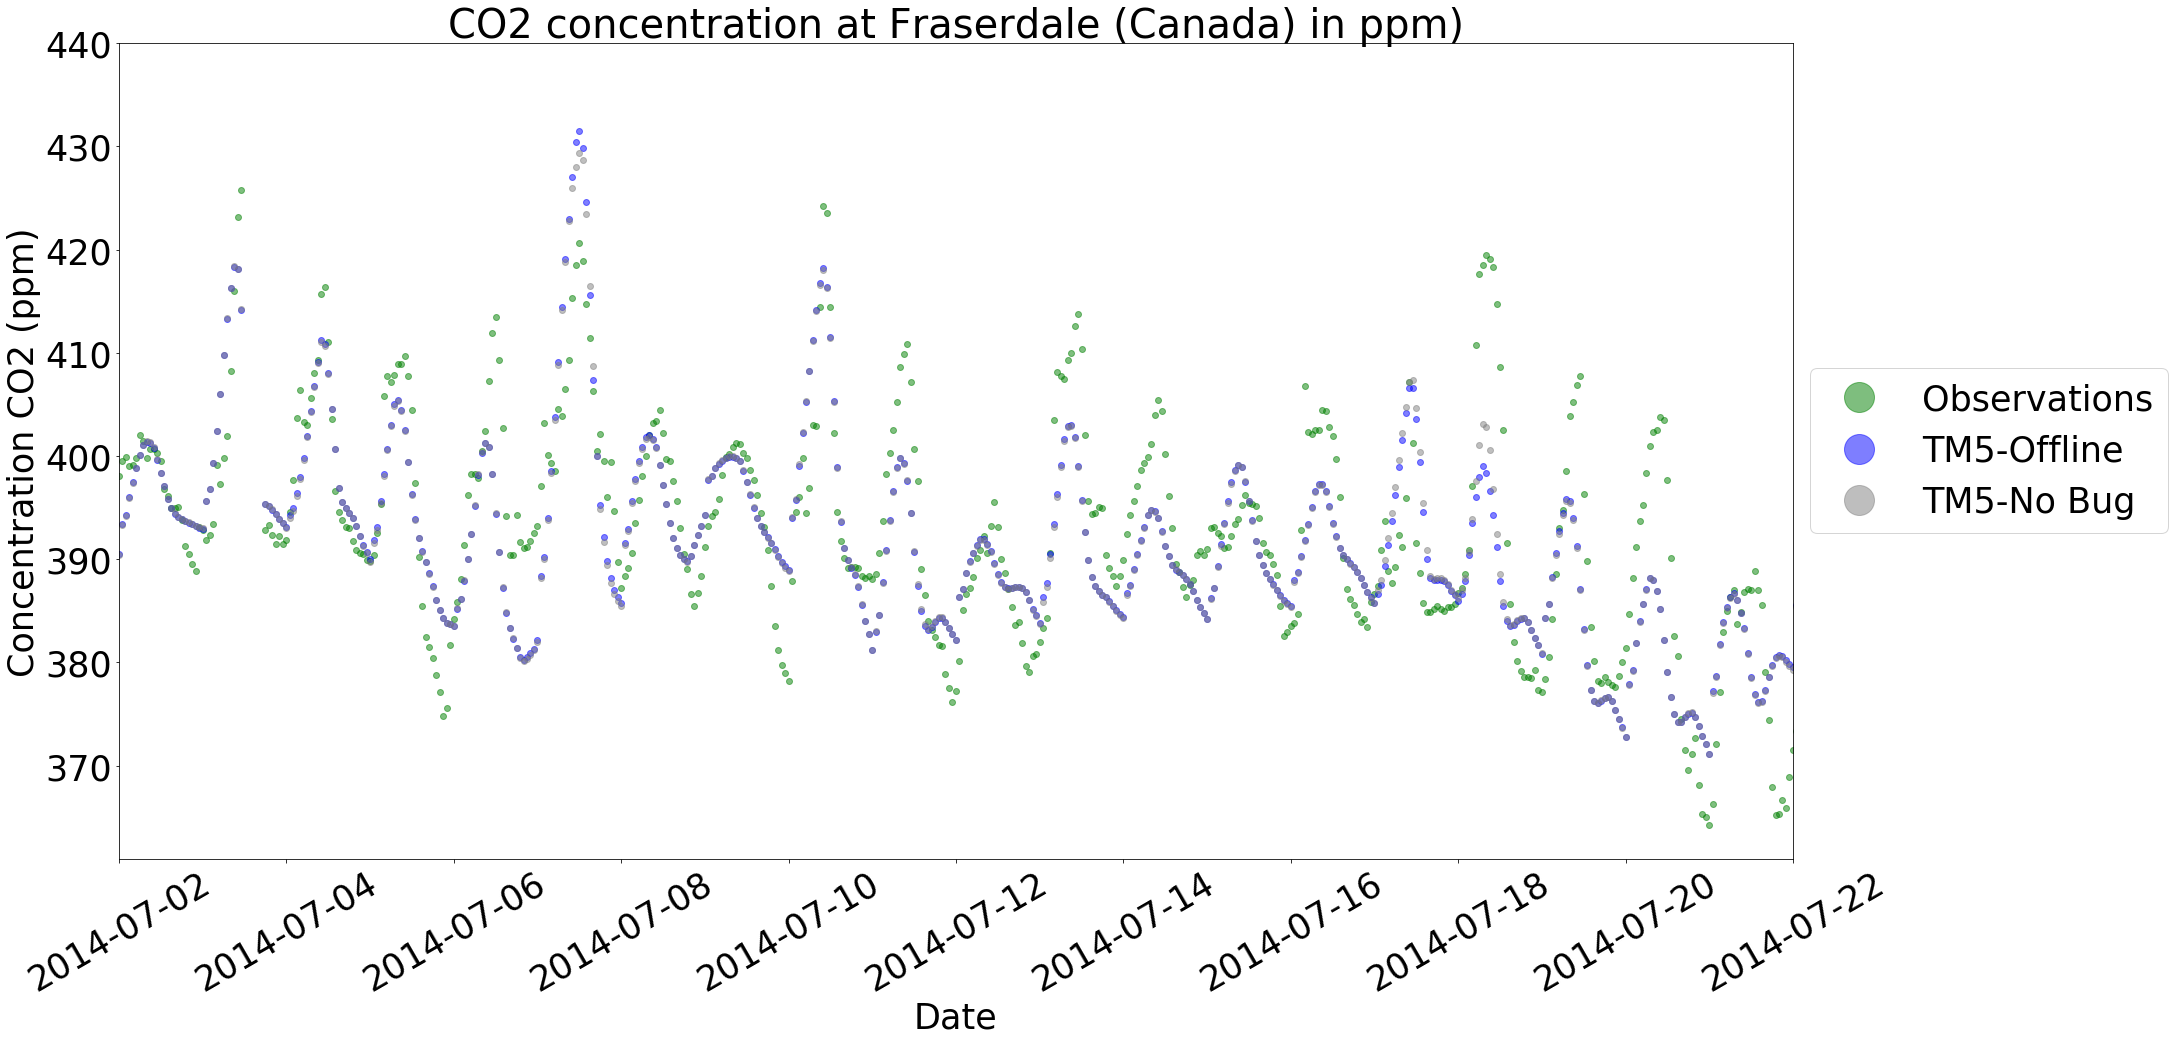

In [40]:
# for column in df.columns:
#     print(column)
# sys.exit()

# Timeseries of chosen plot (comparable to figure 1), uses the data calculated by the previous block. 
# Can afterwards be run multiple times for chosen stations
plot_df = df[(df.G_date>'2014-07-01') & (df.G_date<'2014-08-31')]
f, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(30, 15))
size = 6
alpha=.5
mask_loc = 'fsd'
mask = (df.I_obs_loc==mask_loc)
ax1.set_title("CO2 concentration at Fraserdale (Canada) in ppm)",fontsize=40)
# ax1.plot_date(x=plot_df.G_date[mask], y=plot_df.A_fin_obs[mask]-plot_df.A_fin_obs[mask].mean(), color='g', alpha=alpha, ms=size, label='Observations')
# ax1.plot_date(x=plot_df.G_date[mask], y=plot_df.B_fmp_obs[mask]-plot_df.B_fmp_obs[mask].mean(), color='b', alpha=alpha, ms=size, label='TM5-Offline')
# ax1.plot_date(x=plot_df.G_date[mask], y=plot_df.fnobug_obs[mask]-plot_df.fnobug_obs[mask].mean(), color='0.5', alpha=alpha, ms=size, label='TM5-n1c3')

ax1.plot_date(x=plot_df.G_date[mask], y=plot_df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=plot_df.G_date[mask], y=plot_df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=plot_df.G_date[mask], y=plot_df.fnobug_obs[mask], color='0.5', alpha=alpha, ms=size, label='TM5-No Bug')


ax1.set_ylabel('Concentration CO2 (ppm)', fontsize=35)
ax1.set_xlabel('Date', fontsize=35)
ax1.set_ylim(361,440)
ax1.set_xlim('2014-07-02','2014-07-22')
lgd=ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 5,fontsize='35')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
plt.xticks(rotation=30)
plt.show()

count    1403.000000
mean        0.005115
std         0.307315
min        -1.485547
25%        -0.064654
50%         0.002299
75%         0.089261
max         1.489563
dtype: float64


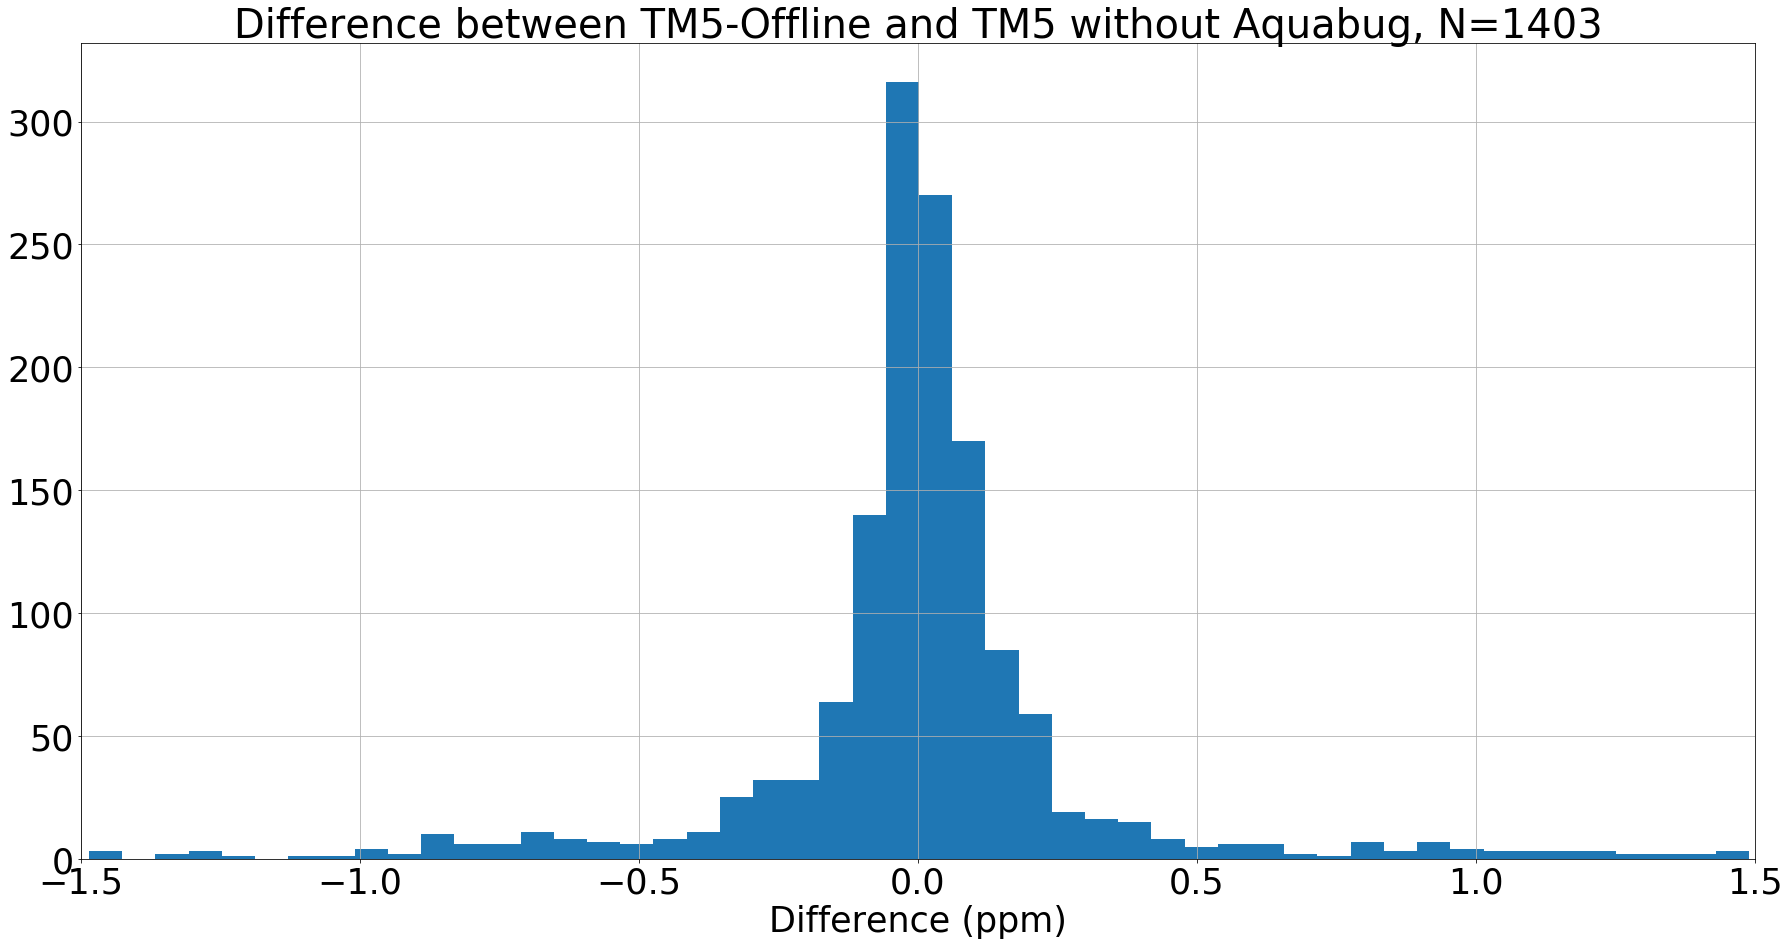

In [69]:
Difference = plot_df.B_fmp_obs[mask]-plot_df.fnobug_obs[mask]
Difference=Difference[(Difference>-1.5) & (Difference<1.5)]
print(Difference.describe())
# Difference=Difference[]
title = "Difference between TM5-Offline and TM5 without Aquabug, N=1403"
f, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(30, 15))
ax1.set_title(title,fontsize=40)
ax1.set_xlabel('Difference (ppm)', fontsize=35)
ax1=Difference.hist(bins=50)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(35)
    
ax1.set_xlim(-1.5,1.5)
plt.show()



# ax1.plot_date(x=plot_df.G_date[mask], y=plot_df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
# ax1.plot_date(x=plot_df.G_date[mask], y=plot_df.fnobug_obs[mask], color='0.5', alpha=alpha, ms=size, label='TM5-n1c3')
